
# COVID - 19 DATA ANALYSIS  GERMANY 

### This NoteBook deals with exploratory data analysis for the country Germany. The data contains various features regarding the COVID -19 outbreak.


## Objectives

- The main goal of this note book is the analysis and predict the number of new cases for the country Germnay in future days.  
-   Obtain data insights using pandas.
-  Cleaning the data with appropriate techniques.
- performing exloratory data analysis (EDA) on the data to get better insights.
-  Modeling the data with various model with appropriate feature selection techniques.

# Table of contents 

1) Data cleaning 

2) EDA 

3) Modeling and feature selection


# ABOUT THE DATA
 ### The data is obtaind for the website ourworldindata.org 
  </ul> 
    <li>data source: <a href="https://ourworldindata.org/coronavirus-source-data" target="_blank">https://ourworldindata.org/coronavirus-source-data</a></li>
    <li>data type available : .xslx .csv .json (daily updated)</li>
    <li>data source: <a href="https://github.com/owid/covid-19-data/tree/master/public/data/" target="_blank">https://github.com/owid/covid-19-data/tree/master/public/data/</a></li>
    
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the libraries required such  as 
-   Pandas for loding the data ans performing basic operations .
-   Matplotlib ans seaborn for vizalization and EDA. 


In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy  as np 
import datetime as dt
pd.set_option('mode.chained_assignment',None)

#### Loading the csv file using the pd.read_cvs command in pandas. 

In [3]:
df_data_1  = pd.read_csv("/content/drive/My Drive/Colab Notebooks/linear-comprehensive-covid-data.csv")

#### The data containd the Covid -19  With respect to all countries so grouping the data with respect to coutnry and obtaning the data with respect to germany as our Notebook deals with covid data in germany. 

In [4]:
grouped = df_data_1.groupby(df_data_1.location)
df_germany  = grouped.get_group("Germany")

print("The shape of the data frame is ", (df_germany.shape))
print("The columns of the data frame are",df_germany.columns)
df_germany.head(10)

The shape of the data frame is  (413, 59)
The columns of the data frame are Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_va

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
26027,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,0.012,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26028,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,NaN,0.048,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26029,DEU,Europe,Germany,2020-01-29,4.0,0.0,NaN,NaN,NaN,NaN,0.048,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26030,DEU,Europe,Germany,2020-01-30,4.0,0.0,NaN,NaN,NaN,NaN,0.048,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26031,DEU,Europe,Germany,2020-01-31,5.0,1.0,NaN,NaN,NaN,NaN,0.060,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26032,DEU,Europe,Germany,2020-02-01,8.0,3.0,1.143,NaN,NaN,0.0,0.095,0.036,0.014,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26033,DEU,Europe,Germany,2020-02-02,10.0,2.0,1.429,NaN,NaN,0.0,0.119,0.024,0.017,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.727,1.178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26034,DEU,Europe,Germany,2020-02-03,12.0,2.0,1.571,NaN,NaN,0.0,0.143,0.024,0.019,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26035,DEU,Europe,Germany,2020-02-04,12.0,0.0,1.143,NaN,NaN,0.0,0.143,0.000,0.014,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26036,DEU,Europe,Germany,2020-02-05,12.0,0.0,1.143,NaN,NaN,0.0,0.143,0.000,0.014,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# 1) Data cleaning 

#### Checking the features of the dataframe and finding the amount of missing values.

In [5]:
df_germany.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              42
new_deaths                                42
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  42
new_deaths_per_million                    42
new_deaths_smoothed_per_million            5
reproduction_rate                         36
icu_patients                              92
icu_patients_per_million                  92
hosp_patients                            413
hosp_patients_per_million                413
weekly_icu_admissions                    413
weekly_icu

In [6]:
features_with_na=[features for features in df_germany.columns if df_germany[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df_germany[feature].isnull().mean(), 4)*100,  ' % missing values')

new_cases_smoothed 1.21  % missing values
total_deaths 10.17  % missing values
new_deaths 10.17  % missing values
new_deaths_smoothed 1.21  % missing values
new_cases_smoothed_per_million 1.21  % missing values
total_deaths_per_million 10.17  % missing values
new_deaths_per_million 10.17  % missing values
new_deaths_smoothed_per_million 1.21  % missing values
reproduction_rate 8.72  % missing values
icu_patients 22.28  % missing values
icu_patients_per_million 22.28  % missing values
hosp_patients 100.0  % missing values
hosp_patients_per_million 100.0  % missing values
weekly_icu_admissions 100.0  % missing values
weekly_icu_admissions_per_million 100.0  % missing values
weekly_hosp_admissions 85.96000000000001  % missing values
weekly_hosp_admissions_per_million 85.96000000000001  % missing values
new_tests 100.0  % missing values
total_tests 87.41  % missing values
total_tests_per_thousand 87.41  % missing values
new_tests_per_thousand 100.0  % missing values
new_tests_smoothed 15.0

#### From the above features we can select only the features required from the above data set for our analysis.

In [7]:
df_germany = df_germany[['date', 'total_cases', 'new_cases',
        'total_deaths', 'new_deaths','new_tests_smoothed', 'positive_rate',
       'stringency_index','reproduction_rate','tests_per_case']]

In [8]:
features_with_na=[features for features in df_germany.columns if df_germany[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df_germany[feature].isnull().mean(), 4)*100,  ' % missing values')

total_deaths 10.17  % missing values
new_deaths 10.17  % missing values
new_tests_smoothed 15.010000000000002  % missing values
positive_rate 87.41  % missing values
reproduction_rate 8.72  % missing values
tests_per_case 87.41  % missing values


#### Droping the coloumns with 87% of missing values.

In [9]:
df_germany.drop(columns=[ 'tests_per_case', 'positive_rate'], axis =1 ,inplace =True)

Text(0.5, 1.0, 'new deaths vs date')

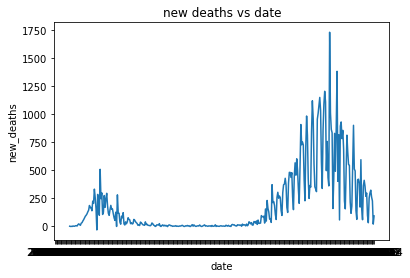

In [10]:
sns.lineplot(y=df_germany.new_deaths,x=df_germany.date).set_title('new deaths vs date')

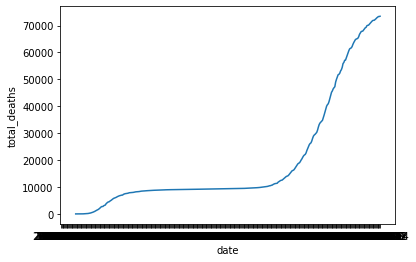

In [11]:
sns.lineplot(y=df_germany.total_deaths,x=df_germany.date)

####  On 9 March 2020, the first two deaths in Germany were reported
Source -[link ](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Germany#:~:text=On%2025%20and%2026%20February,reported%20from%20Essen%20and%20Heinsberg.)

In [12]:
df_germany[df_germany['date'] > '2020-03-09']['total_deaths'].isnull().sum()

0

In [13]:
df_germany[df_germany['date'] > '2020-03-09']['new_deaths'].isnull().sum()

0

#### we can see that in the data also there are no null values after march 9th so replacing the null values from total deaths and new deaths with 0

In [14]:
df_germany['total_deaths']=df_germany['total_deaths'].fillna(0)
df_germany['new_deaths']=df_germany['new_deaths'].fillna(0)

#### Replacing the rest of the missing values by the mean of the data.

In [15]:
df_germany['reproduction_rate']=df_germany['reproduction_rate'].fillna(df_germany['reproduction_rate'].mean())
df_germany['new_tests_smoothed']=df_germany['new_tests_smoothed'].fillna(df_germany['new_tests_smoothed'].mean())
df_germany['stringency_index']=df_germany['stringency_index'].fillna(df_germany['stringency_index'].mean())

In [16]:
df_germany.isnull().sum().sum()

0

In [17]:
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 26027 to 26439
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                413 non-null    object 
 1   total_cases         413 non-null    float64
 2   new_cases           413 non-null    float64
 3   total_deaths        413 non-null    float64
 4   new_deaths          413 non-null    float64
 5   new_tests_smoothed  413 non-null    float64
 6   stringency_index    413 non-null    float64
 7   reproduction_rate   413 non-null    float64
dtypes: float64(7), object(1)
memory usage: 29.0+ KB


#### We are done with dealing with missing values.And the data is clean now.

# 2) EDA

### Univariate analysis

#### Distrubution plots to understand the data.

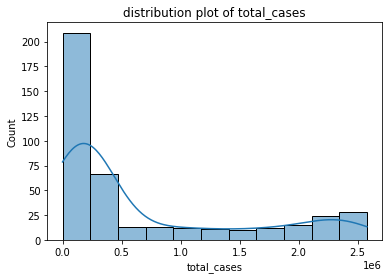

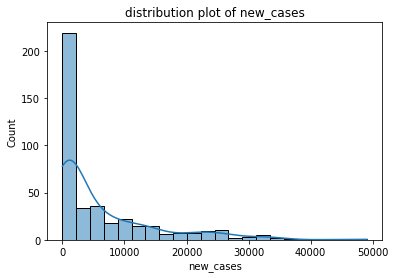

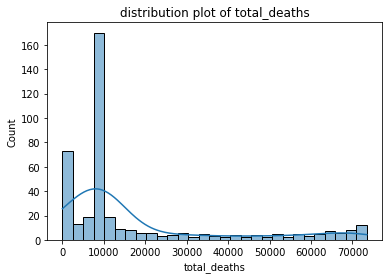

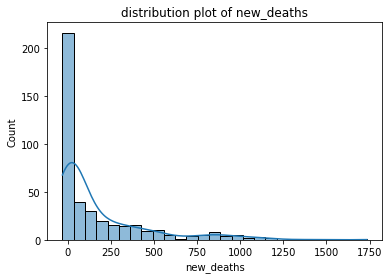

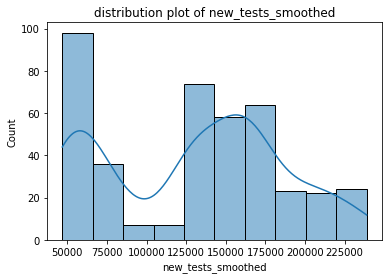

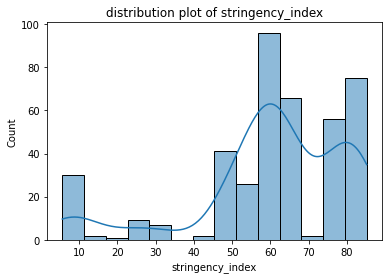

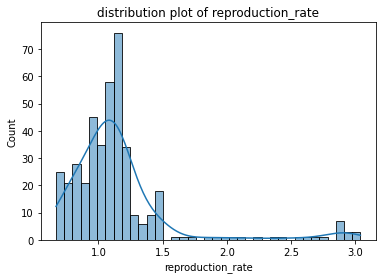

In [18]:
df_data  = df_germany.loc[:,'total_cases':'reproduction_rate']
df_data = df_data.select_dtypes([np.int, np.float])
for i, col in enumerate(df_data.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df_data,kde=True).set_title("distribution plot of "+col)

#### WE can say that the data is not gasiuan distributed.

#### Adding new feature positive rate ( i.e rate or the ratio of the confirmed cases to number of people tested on that day)

Text(0.5, 1.0, 'distribution plot of recoveres cases')

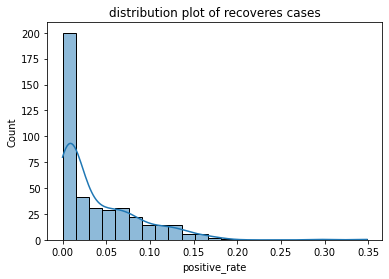

In [19]:
df_germany['positive_rate'] = df_germany['new_cases']/(df_germany['new_tests_smoothed']+1)
sns.histplot(x=df_germany.positive_rate, kde=True).set_title("distribution plot of recoveres cases")

#### Converting the date  to date time object and obtaning month and year features to perform  EDA.

In [20]:
df_germany['date'] = pd.to_datetime(df_germany['date'],format='%Y-%m-%d') 
df_germany['month'] = df_germany['date'].dt.month_name()
df_germany['year'] = df_germany['date'].dt.year
df_germany['month'] = df_germany['month'] + df_germany['year'].astype(str)

In [21]:
df_germany.head()

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests_smoothed,stringency_index,reproduction_rate,positive_rate,month,year
26027,2020-01-27,1.0,1.0,0.0,0.0,129564.125356,5.56,1.151459,0.000008,January2020,2020
26028,2020-01-28,4.0,3.0,0.0,0.0,129564.125356,5.56,1.151459,0.000023,January2020,2020
26029,2020-01-29,4.0,0.0,0.0,0.0,129564.125356,5.56,1.151459,0.000000,January2020,2020
26030,2020-01-30,4.0,0.0,0.0,0.0,129564.125356,5.56,1.151459,0.000000,January2020,2020
26031,2020-01-31,5.0,1.0,0.0,0.0,129564.125356,5.56,1.151459,0.000008,January2020,2020


## Performing the basic statistical methods in the data using the pandas describe function.

In [22]:
df = df_germany.describe()
df

,total_cases,new_cases,total_deaths,new_deaths,new_tests_smoothed,stringency_index,reproduction_rate,positive_rate,year
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,6.797313e+05,6244.169492,17434.469734,177.876513,129564.125356,60.473471,1.151459,0.040294,2020.176755
std,8.182060e+05,8605.289408,20584.214173,283.130698,56195.335639,20.128814,0.430220,0.047134,0.381924
min,1.000000e+00,0.000000,0.000000,-31.000000,46828.000000,5.560000,0.670000,0.000000,2020.000000
25%,1.713240e+05,535.000000,7549.000000,4.000000,71643.000000,55.090000,0.950000,0.006894,2020.000000
50%,2.312920e+05,1842.000000,9263.000000,30.000000,129564.125356,62.040000,1.080000,0.016343,2020.000000
75%,1.094678e+06,9197.000000,17177.000000,250.000000,166494.000000,76.850000,1.190000,0.065714,2020.000000
max,2.578842e+06,49044.000000,73463.000000,1734.000000,238862.000000,85.190000,3.040000,0.348349,2021.000000


We can see that new deaths coloum contain a negative value

In [23]:
sorted(list(df_germany.new_deaths))[:5]

[-31.0, -1.0, 0.0, 0.0, 0.0]

In [24]:
df['new_deaths'] = df['new_deaths'].replace([-31.0, -1.0,],0)

#### Plotting the heat map and checking the correlation between the variables 

,total_cases,new_cases,total_deaths,new_deaths,new_tests_smoothed,stringency_index,reproduction_rate,positive_rate,year
total_cases,1.000000,0.550045,0.968054,0.709947,0.463893,0.616135,-0.277551,0.526957,0.883951
new_cases,0.550045,1.000000,0.382860,0.685618,0.611740,0.436325,-0.093540,0.926057,0.267710
total_deaths,0.968054,0.382860,1.000000,0.599991,0.334240,0.588172,-0.292216,0.378554,0.923394
new_deaths,0.709947,0.685618,0.599991,1.000000,0.333235,0.553256,-0.260317,0.708491,0.599016
new_tests_smoothed,0.463893,0.611740,0.334240,0.333235,1.000000,0.025449,0.137649,0.387344,0.219241
stringency_index,0.616135,0.436325,0.588172,0.553256,0.025449,1.000000,-0.384277,0.544197,0.494484
reproduction_rate,-0.277551,-0.093540,-0.292216,-0.260317,0.137649,-0.384277,1.000000,-0.100399,-0.220618
positive_rate,0.526957,0.926057,0.378554,0.708491,0.387344,0.544197,-0.100399,1.000000,0.312606
year,0.883951,0.267710,0.923394,0.599016,0.219241,0.494484,-0.220618,0.312606,1.000000


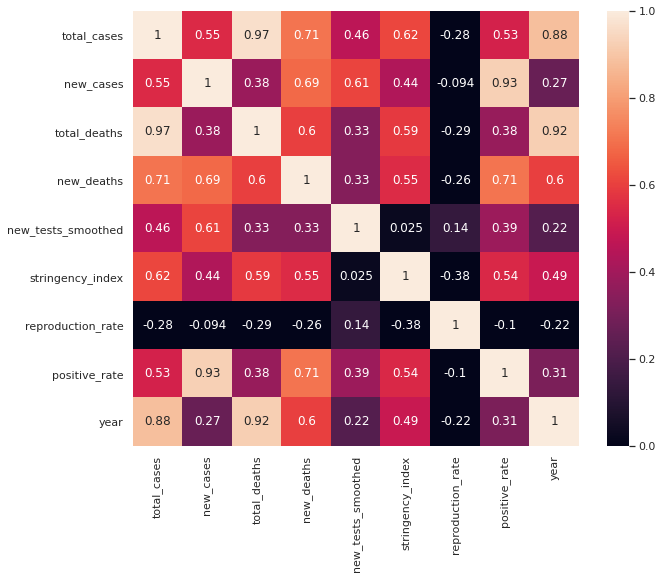

In [25]:
df_corr = df_germany.loc[:,'total_cases':].corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_corr, vmin=0, vmax=1,annot=True)
df_corr

#### Checking the period of the data frame


In [26]:
print("Starting date-",df_germany['date'].min())
print("End date-",df_germany['date'].max())
print("Length of data with respect to days :",(df_germany['date'].max() - df_germany['date'].min()))

Starting date- 2020-01-27 00:00:00
End date- 2021-03-14 00:00:00
Length of data with respect to days : 412 days 00:00:00


* Starting date- 2020-01-27 00:00:00
* End date- 2021-03-14 00:00:00
* Length of data with respect to days : 412 days 00:00:00

### Bivariate analysis

#### Ploting each  varibles with respect to the date.

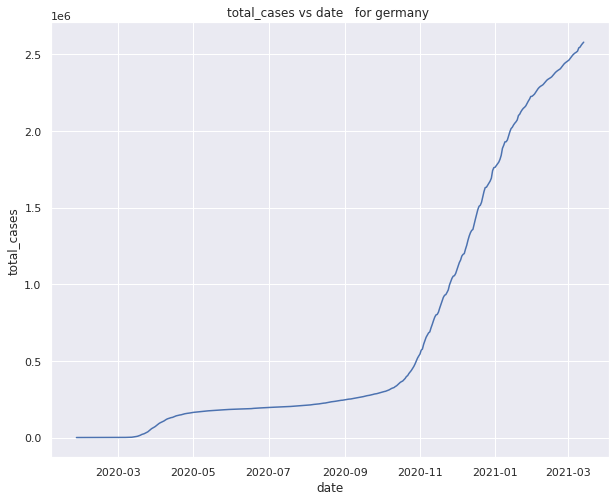

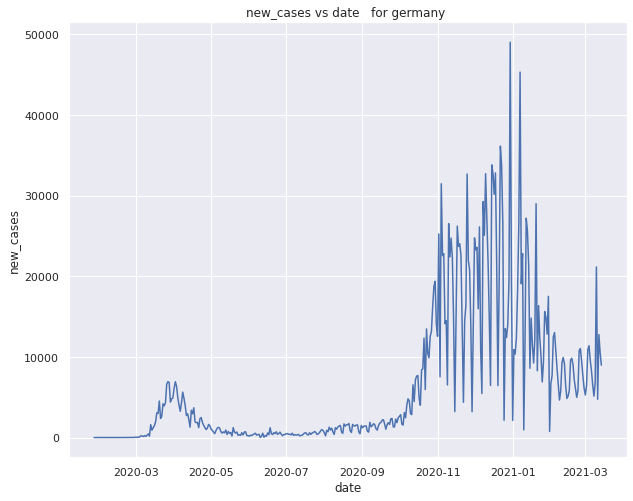

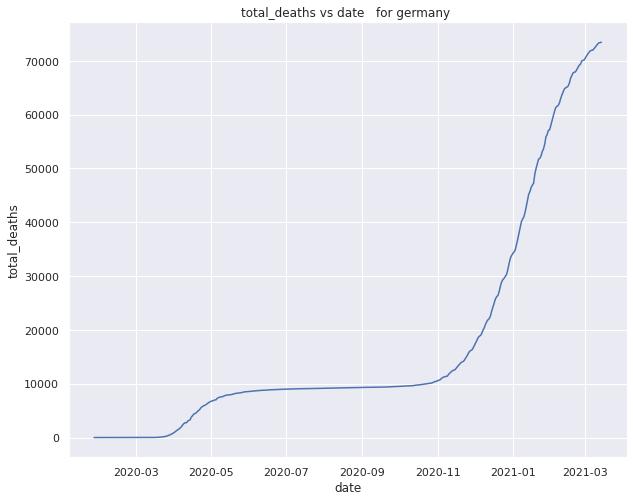

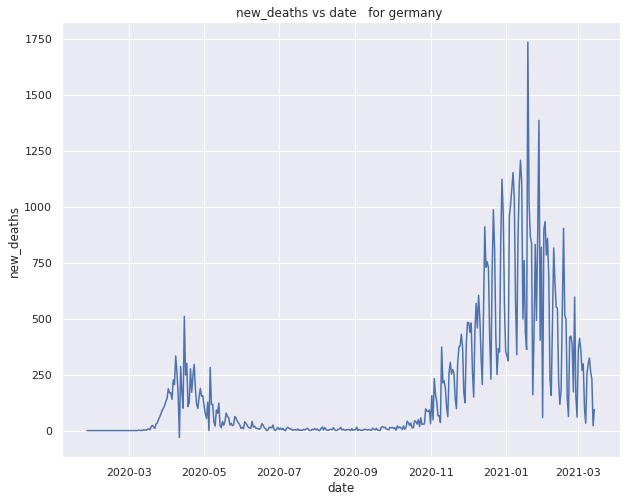

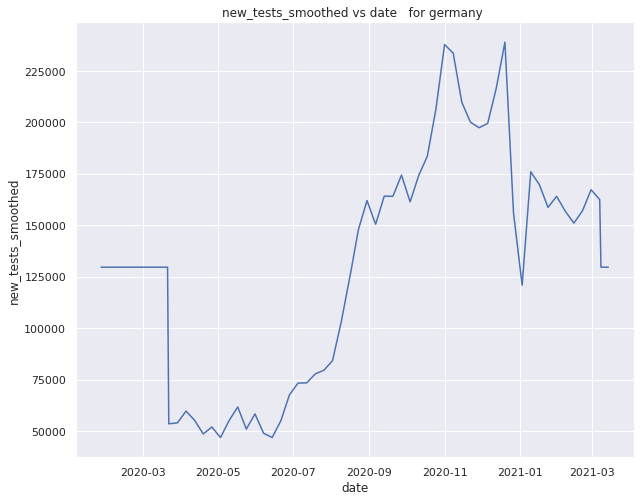

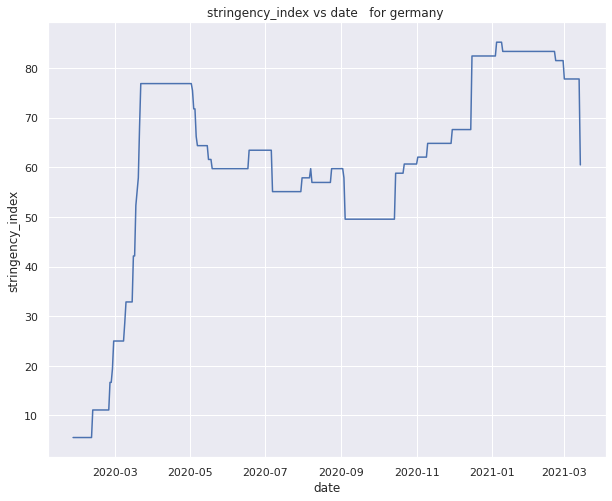

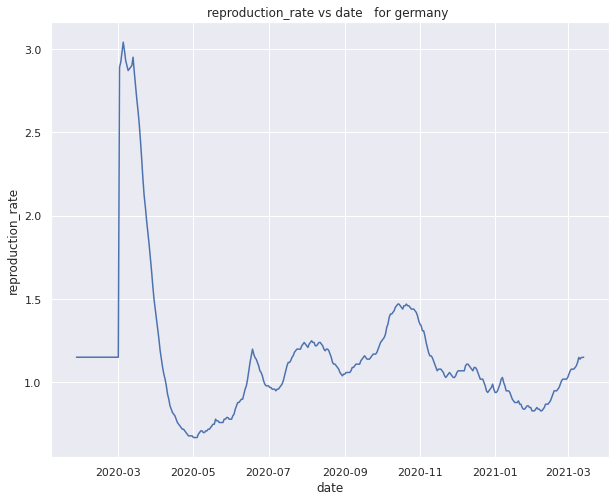

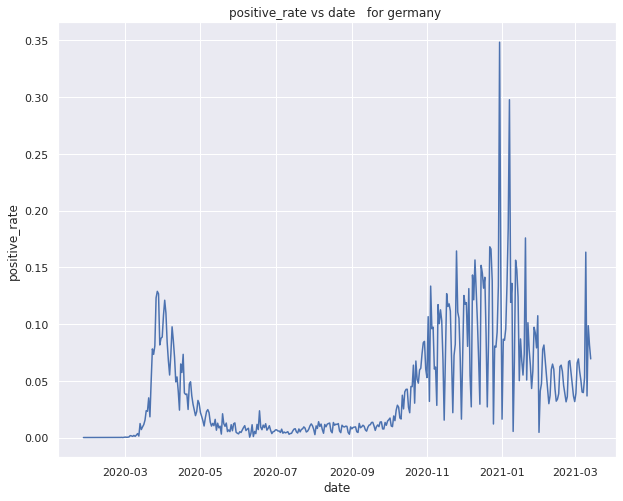

In [27]:
for i, feature in enumerate(df_germany.columns[1:len(df_germany.columns)-2]):
    plt.figure(i)
    g = sns.lineplot(x=df_germany.date,y=feature,data=df_germany).set_title(feature +" vs date   for germany ")

## From the above plot we can see how each features is varied with respect to time. 
we can see that the total cases and total deaths are increasing exponential with time.

####  Lets group the data based on  each month and check the variation of the data.

In [28]:
df_grouped = df_germany.groupby(df_germany.month).sum()
new_order = ['January2020','February2020', 'March2020', 'April2020','May2020','June2020','July2020',  'August2020','September2020','October2020',  'November2020','December2020', 
        'January2021', 'February2021','March2021',  ]
df_grouped = df_grouped.reindex(new_order, axis=0)
df_grouped 

,total_cases,new_cases,total_deaths,new_deaths,new_tests_smoothed,stringency_index,reproduction_rate,positive_rate,year
month,,,,,,,,,
January2020,18.0,5.0,0.0,0.0,6.478206e+05,27.800000,5.757294,0.000039,10100
February2020,561.0,74.0,0.0,0.0,3.757360e+06,294.480000,33.392308,0.000571,58580
March2020,588179.0,71729.0,3876.0,775.0,3.260975e+06,1512.010000,74.631459,1.088827,62620
April2020,3942925.0,91201.0,115270.0,5848.0,1.603652e+06,2305.500000,26.410000,1.666480,60600
May2020,5427815.0,20401.0,242992.0,1917.0,1.690163e+06,1979.100000,22.780000,0.379844,62620
June2020,5670762.0,12008.0,264281.0,450.0,1.637767e+06,1839.830000,29.790000,0.220589,60600
July2020,6265079.0,14981.0,281460.0,157.0,2.361490e+06,1760.610000,33.600000,0.194777,62620
August2020,7024733.0,34403.0,286250.0,156.0,3.853393e+06,1795.740000,36.340000,0.278304,62620
September2020,8023521.0,48111.0,281455.0,192.0,4.883943e+06,1514.890000,33.890000,0.294239,60600


#### Ploting bar plot and line plot to check the trend of the data monthly.

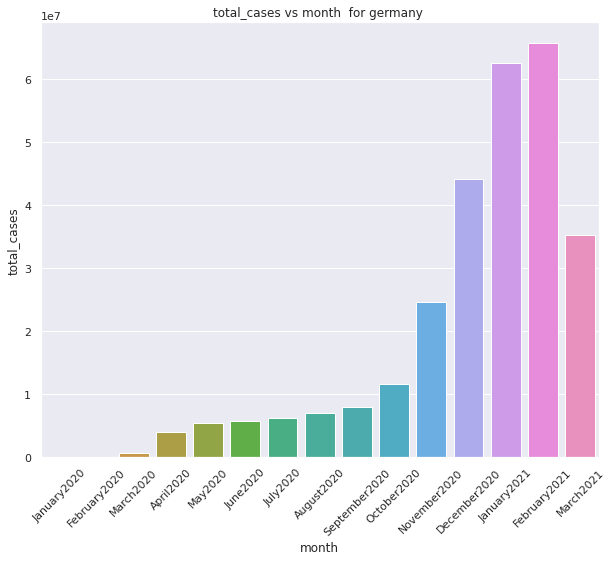

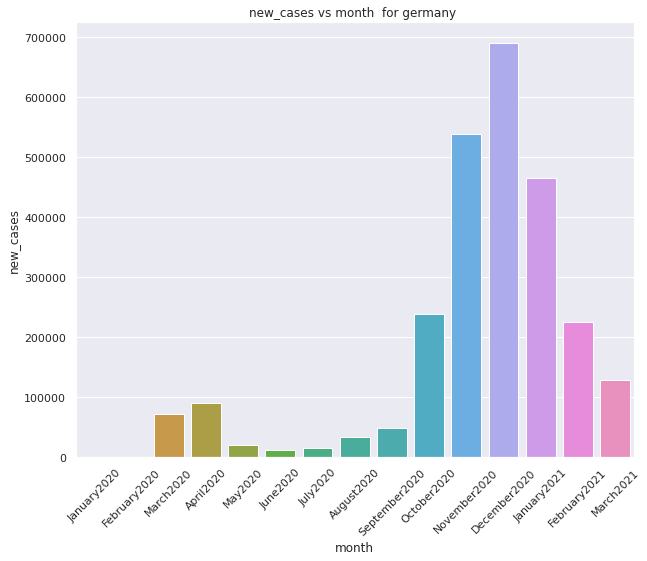

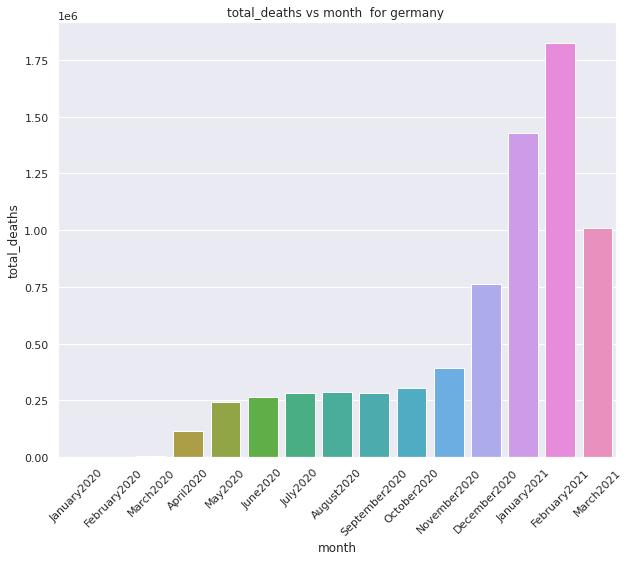

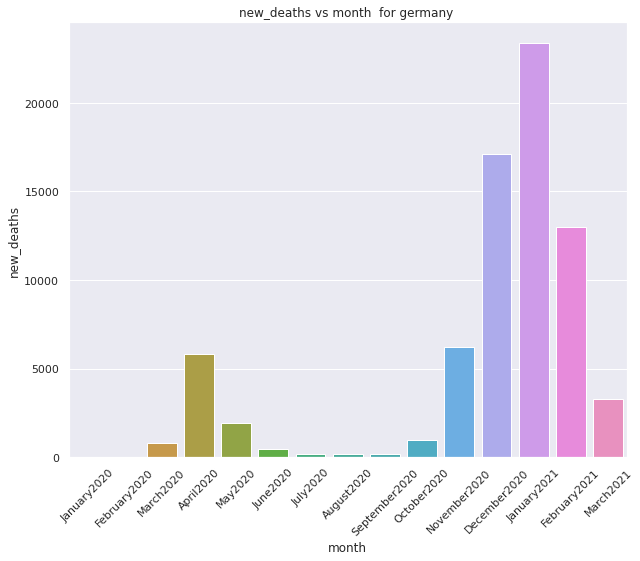

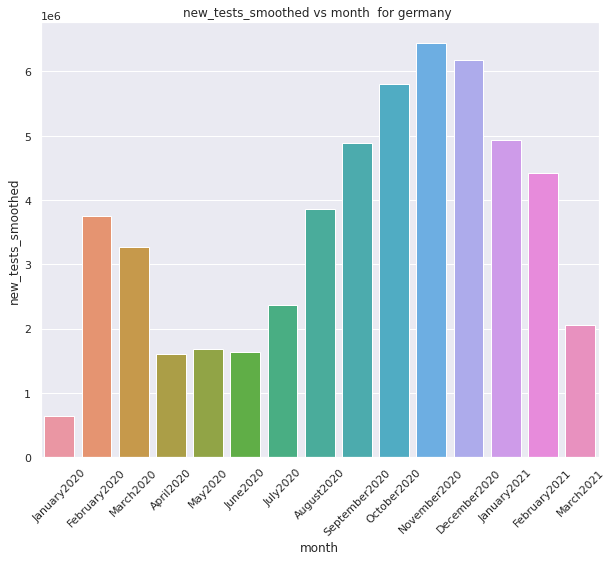

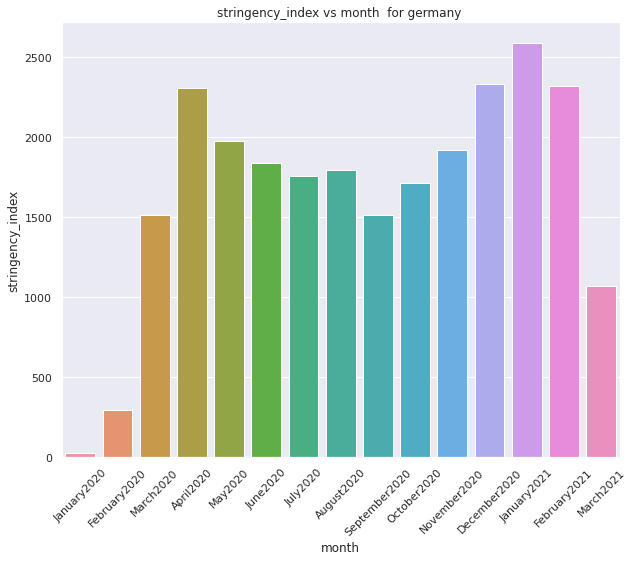

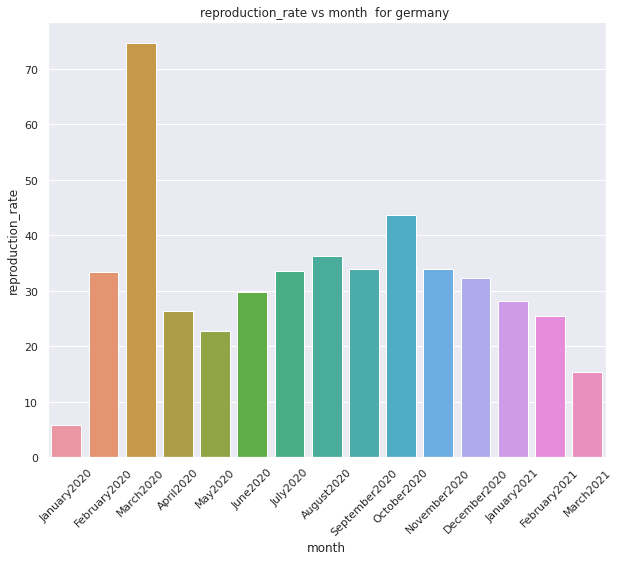

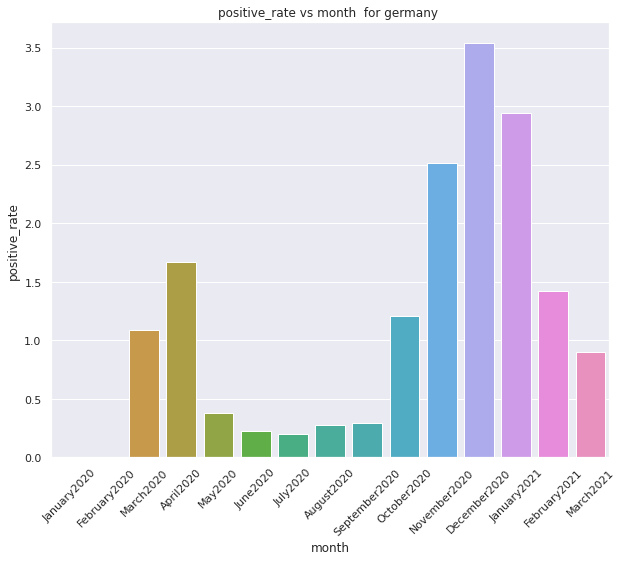

In [29]:
for i, feature in enumerate(df_grouped.columns[:-1]):
    plt.figure(i)
    g = sns.barplot(x=df_grouped.index,y=feature,data=df_grouped,ci=None)
    g.set_xticklabels(df_grouped.index, rotation=45)
    g.set_title(feature +" vs month  for germany ")

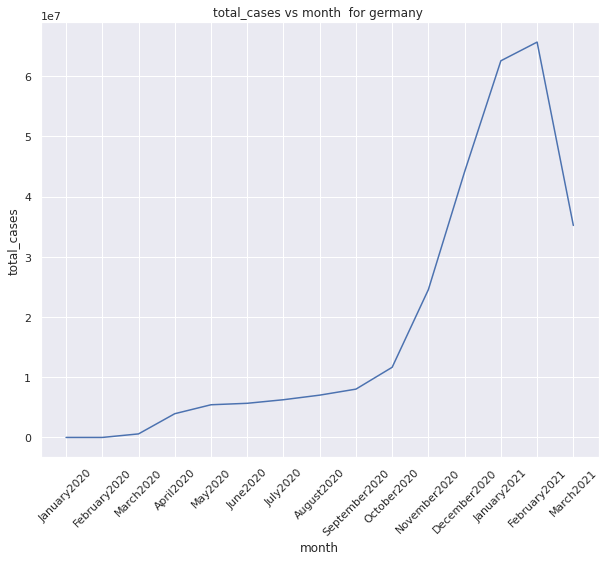

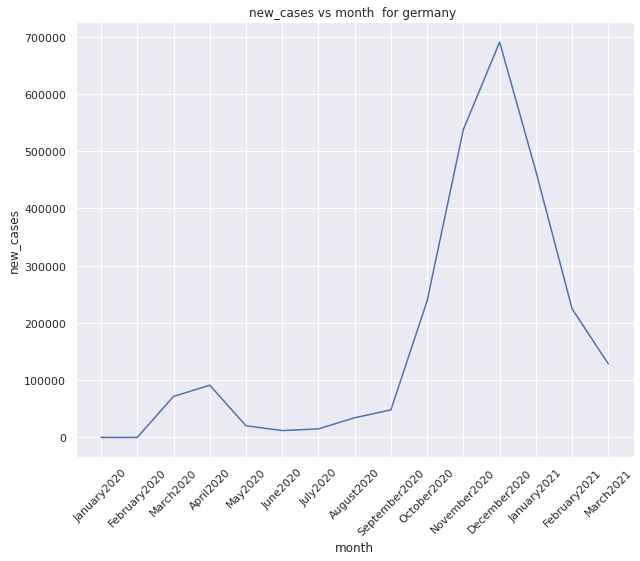

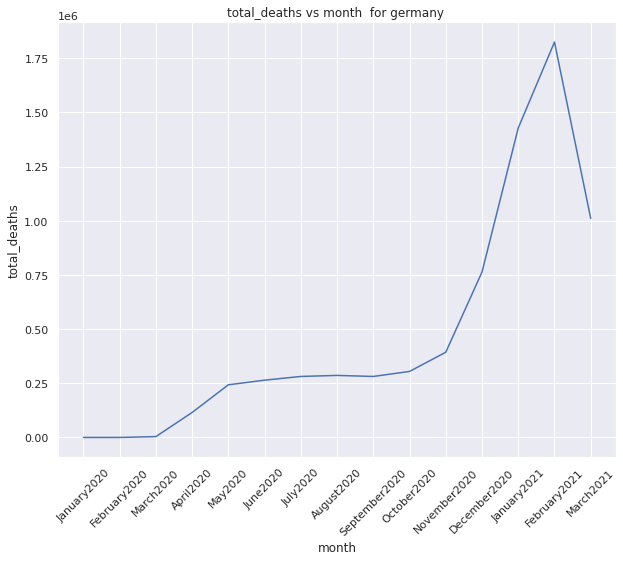

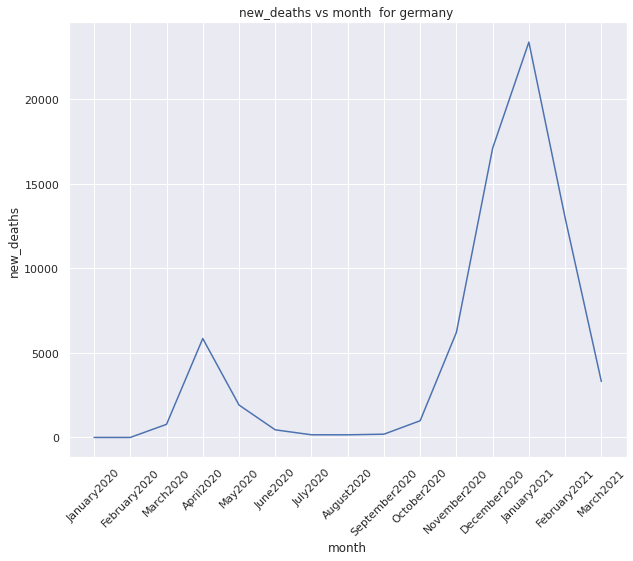

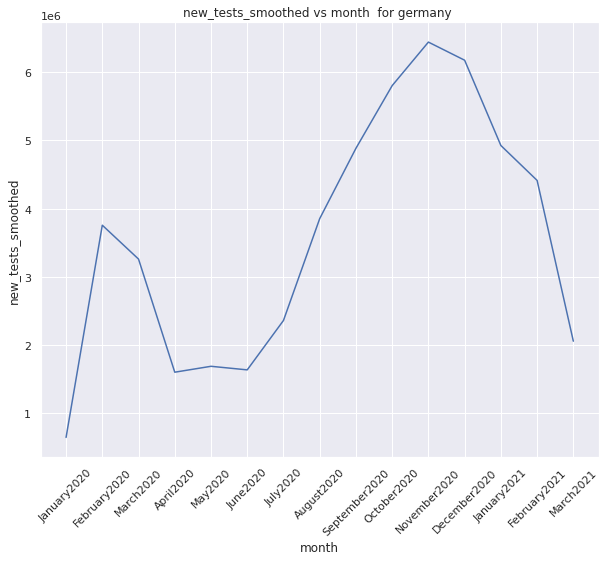

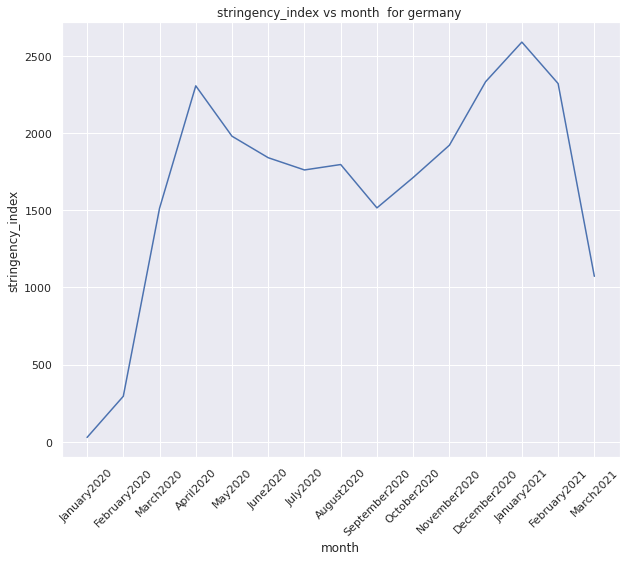

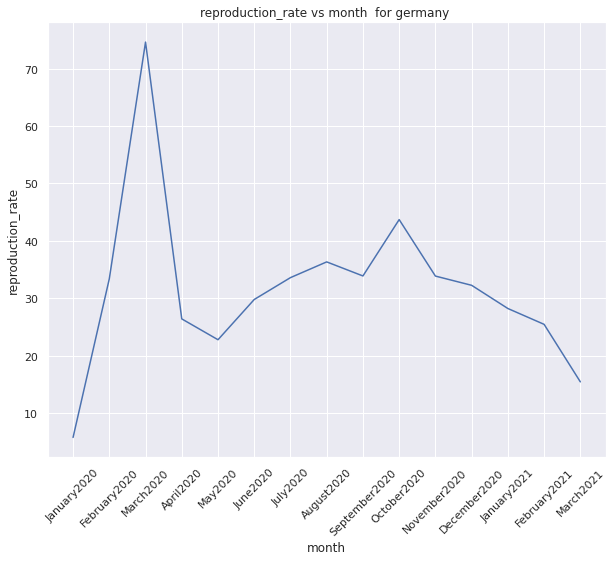

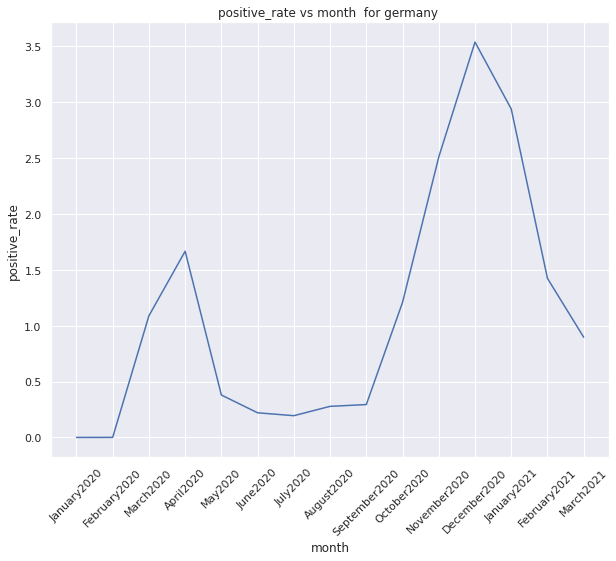

In [30]:
for i, feature in enumerate(df_grouped.columns[:-1]):
    plt.figure(i)
    g = sns.lineplot(x=df_grouped.index,y=feature,data=df_grouped)
    g.set_xticklabels(df_grouped.index, rotation=45)
    g.set_title(feature +" vs month  for germany ")

#### Finding the relation between the total cases and other variable through scatter plot.

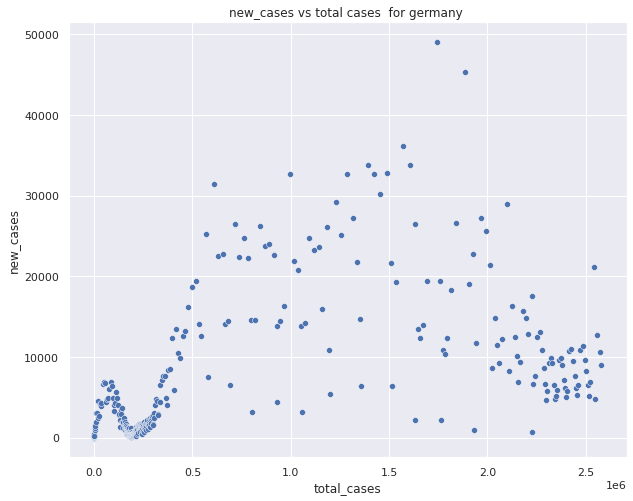

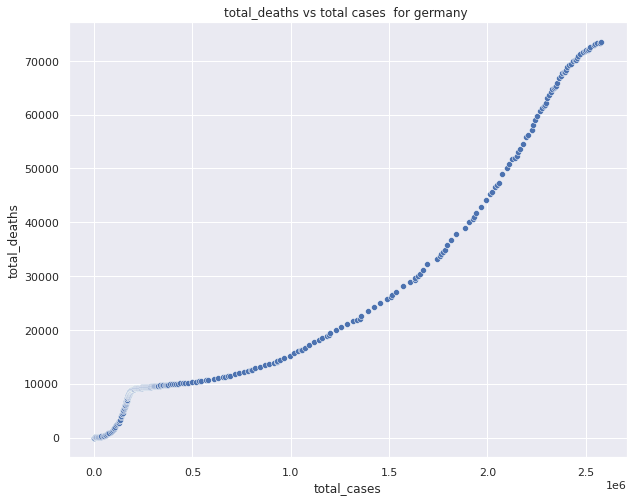

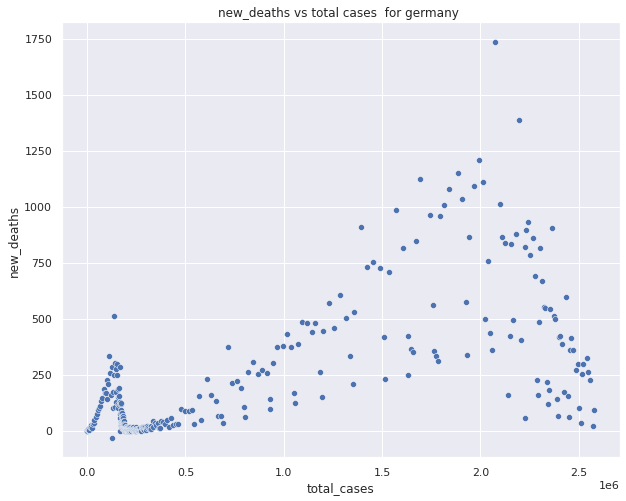

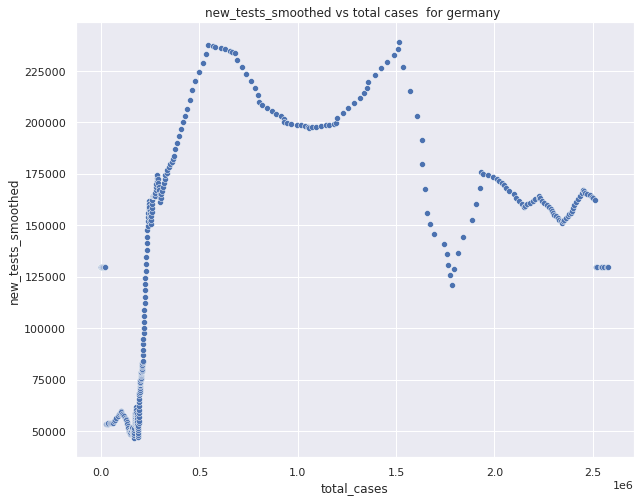

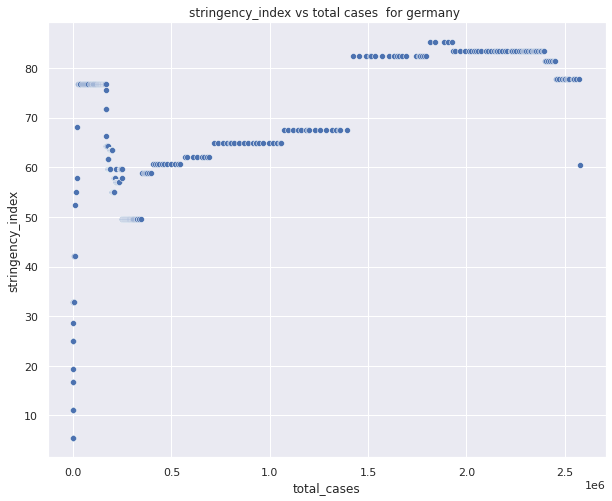

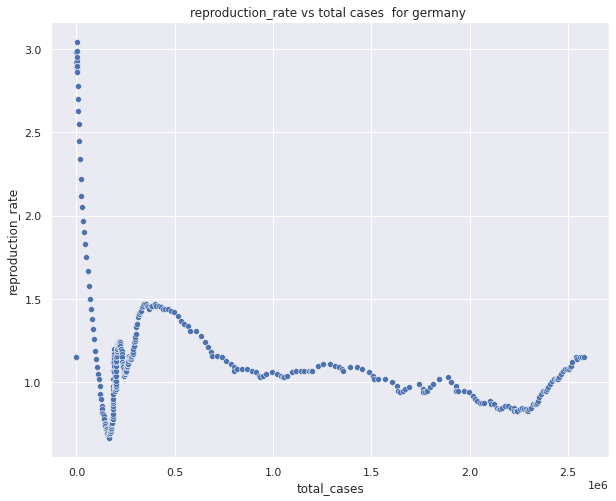

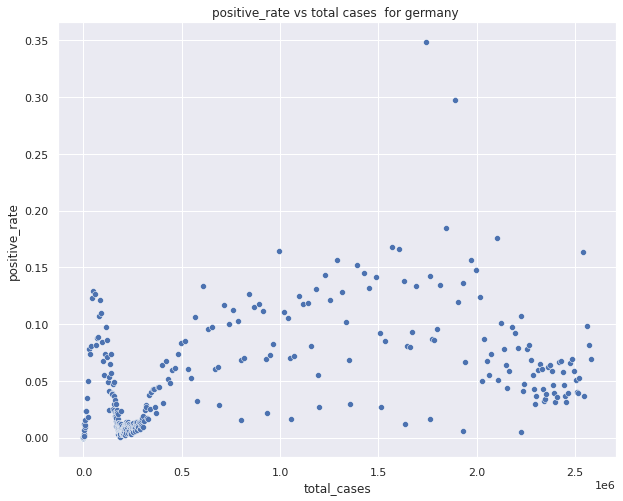

In [31]:
for i, feature in enumerate(df_germany.columns[2:len(df_germany.columns)-2]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany.total_cases,y=feature,data=df_germany).set_title(feature +" vs total cases  for germany ")

#### Finding the relation between the new cases and other variable through scatter plot.

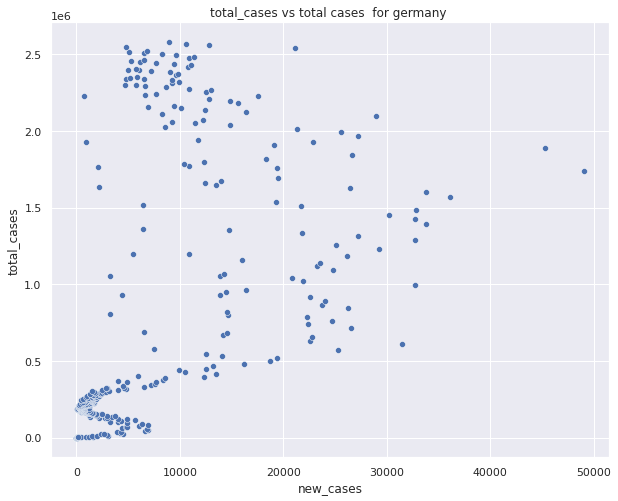

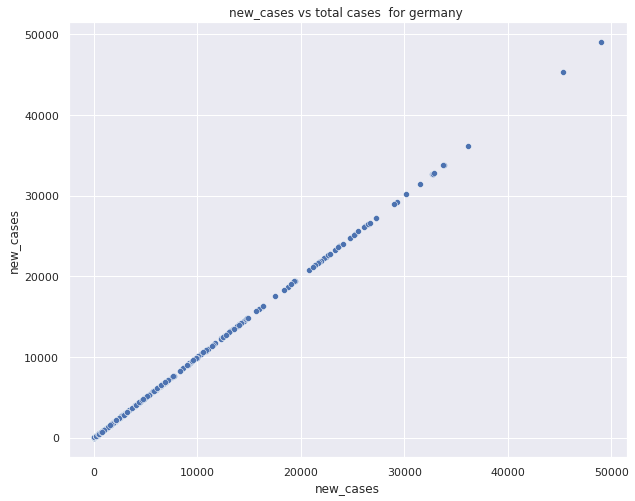

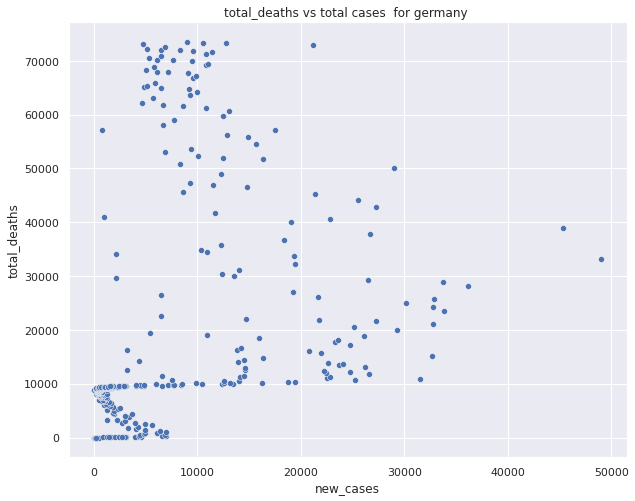

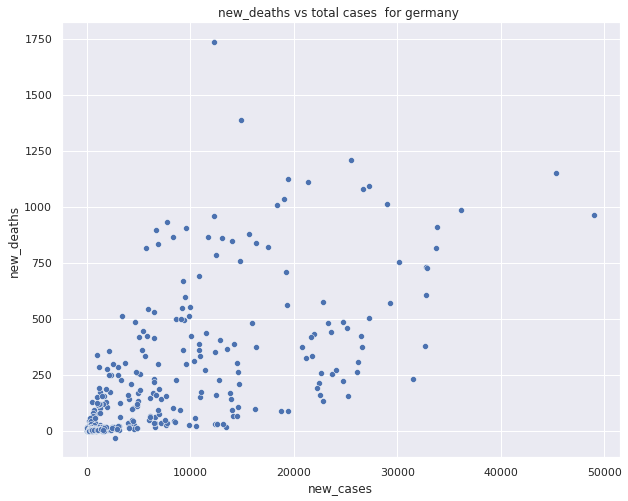

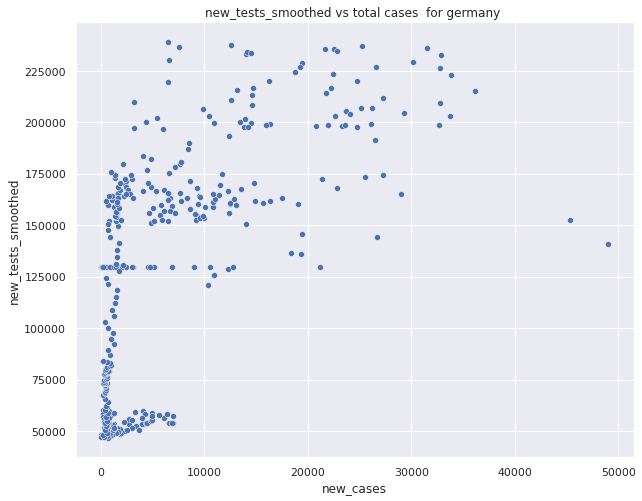

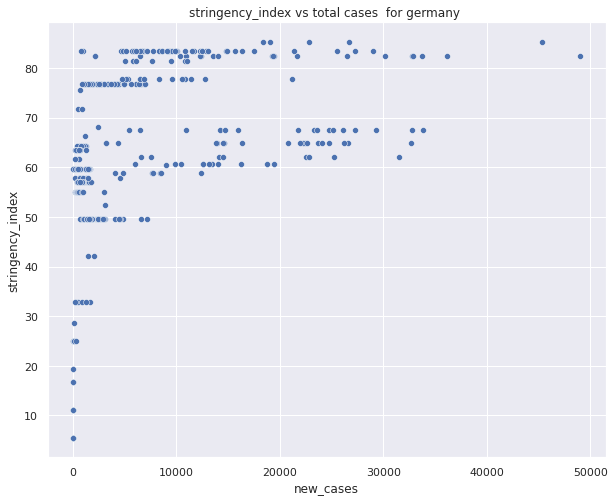

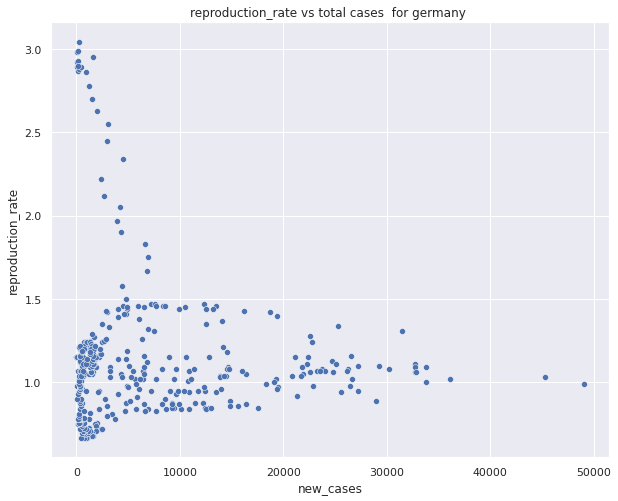

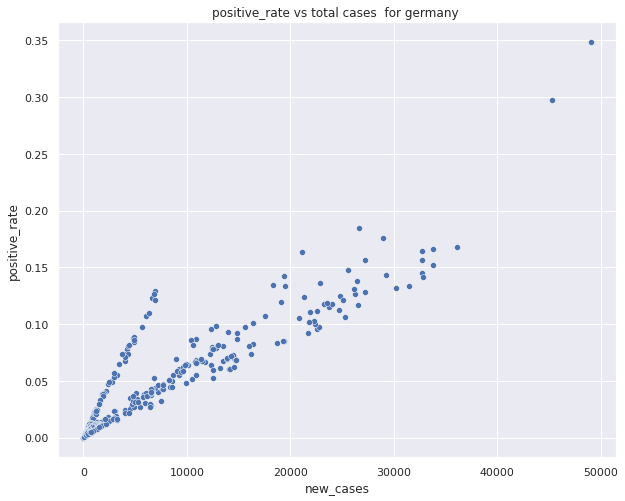

In [32]:
for i, feature in enumerate(df_germany.columns[1:len(df_germany.columns)-2]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany.new_cases,y=feature,data=df_germany).set_title(feature +" vs total cases  for germany ")

#### Finding the relation between the total deaths and other variable through scatter plot.

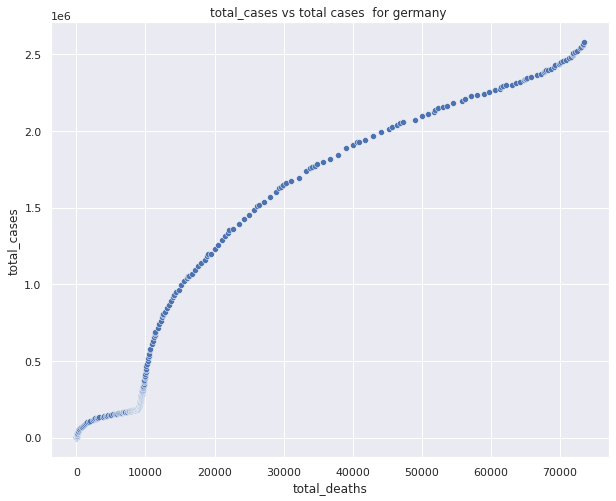

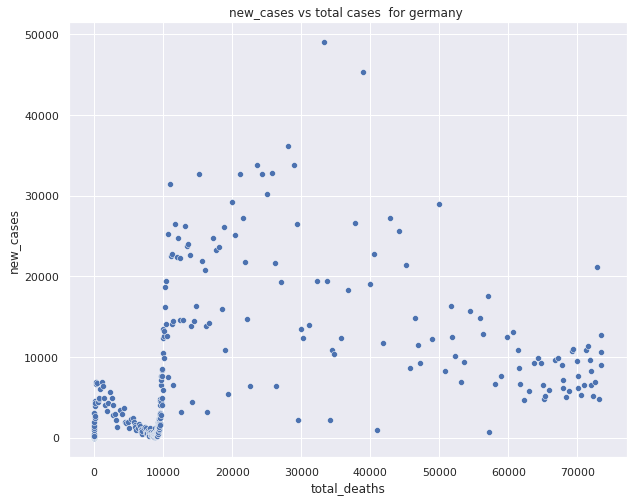

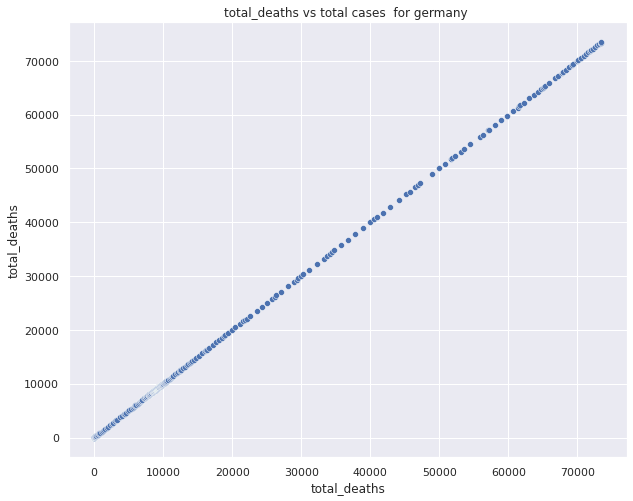

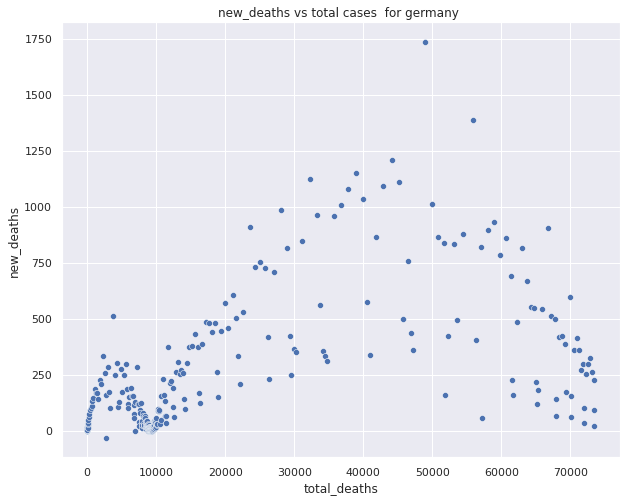

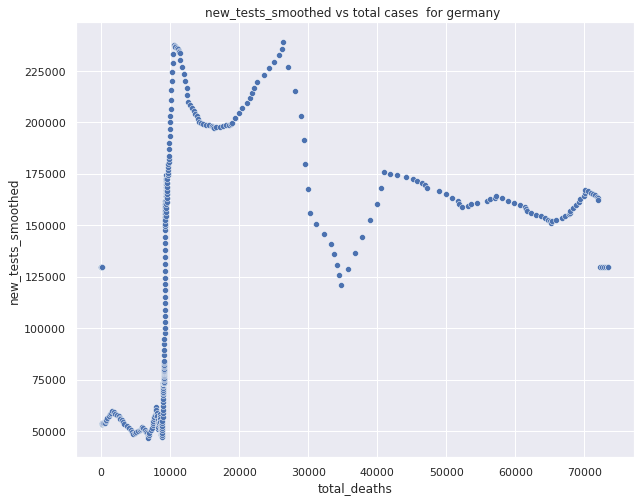

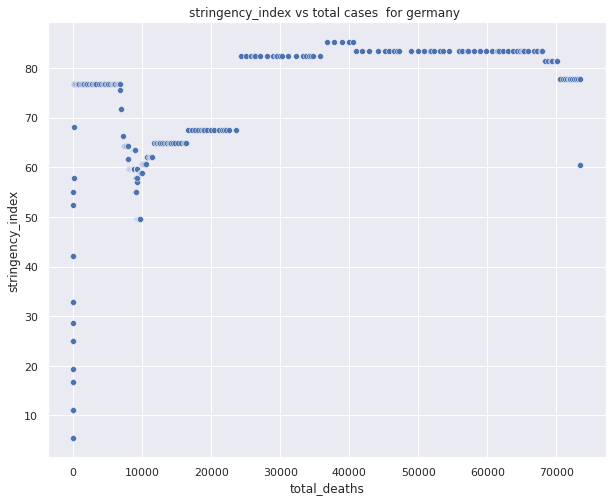

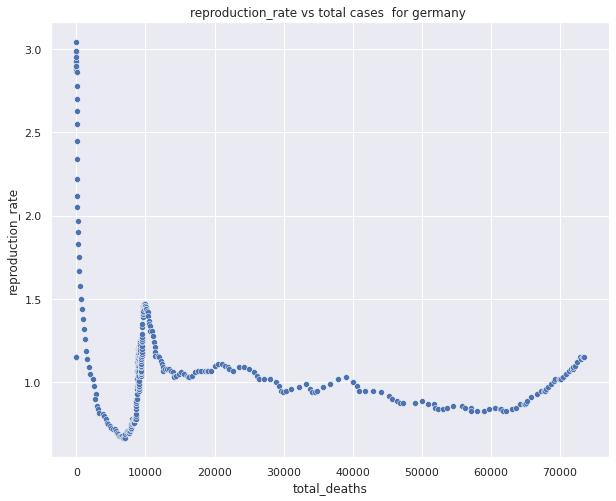

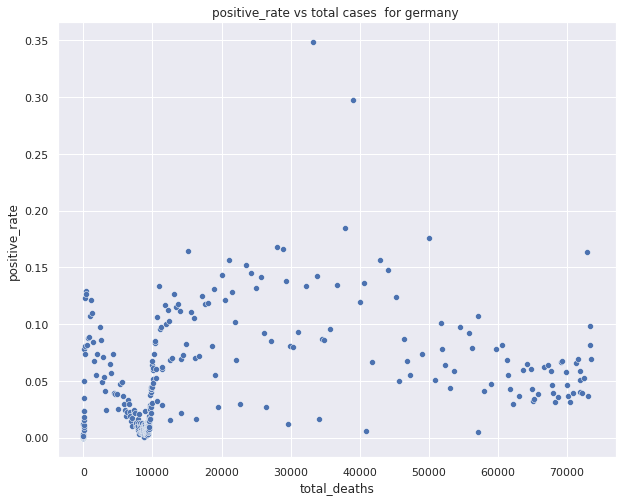

In [33]:
for i, feature in enumerate(df_germany.columns[1:len(df_germany.columns)-2]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany.total_deaths,y=feature,data=df_germany).set_title(feature +" vs total cases  for germany ")

#### Finding the relation between the new deaths and other variable through scatter plot.

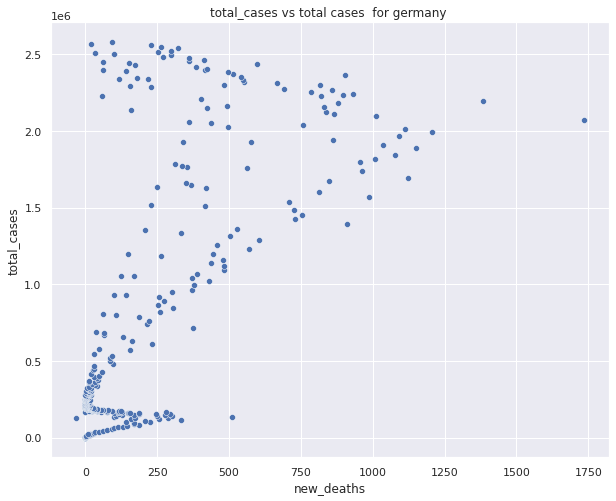

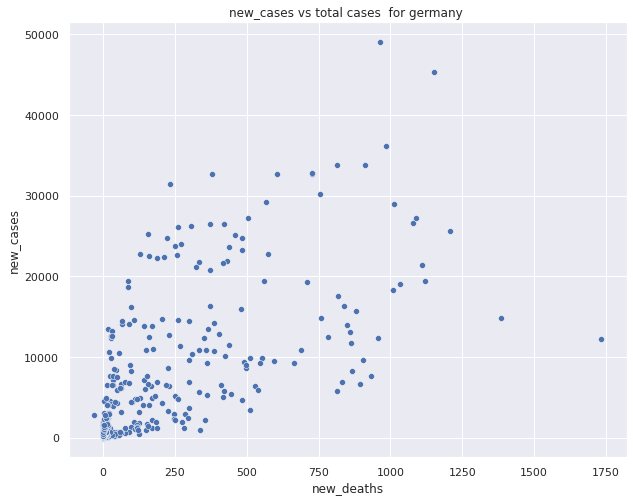

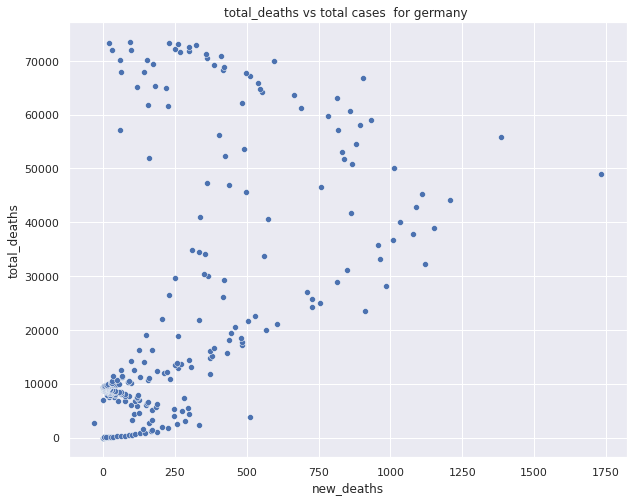

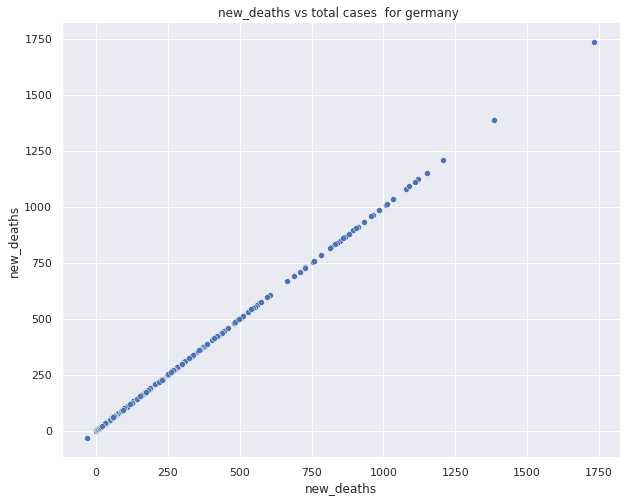

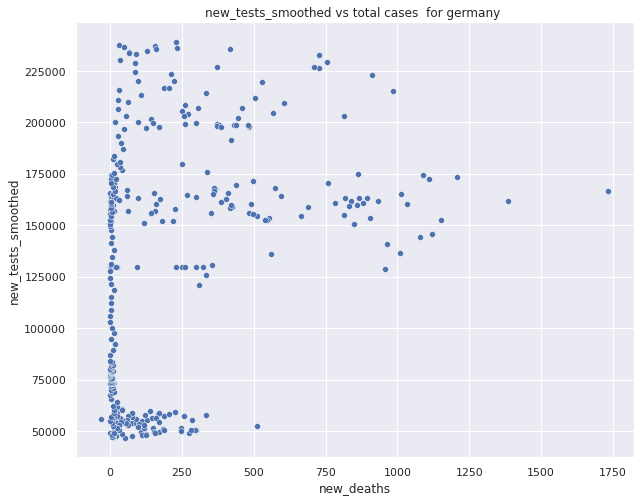

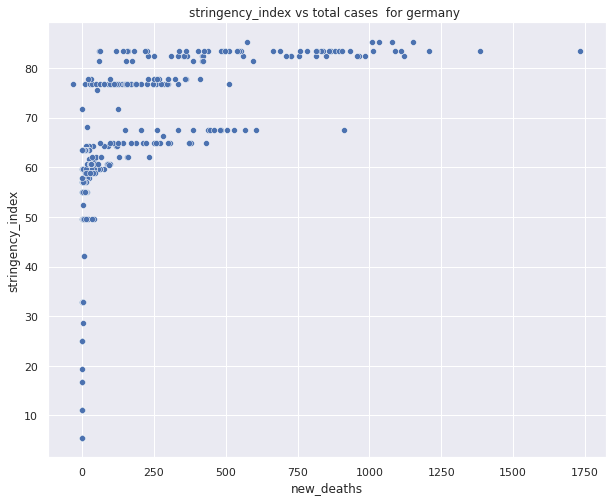

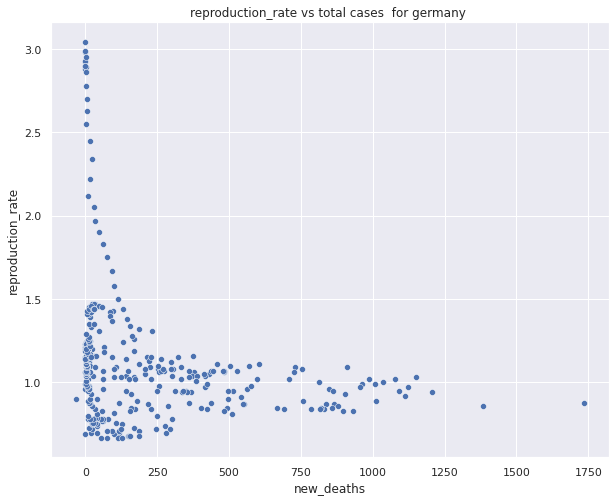

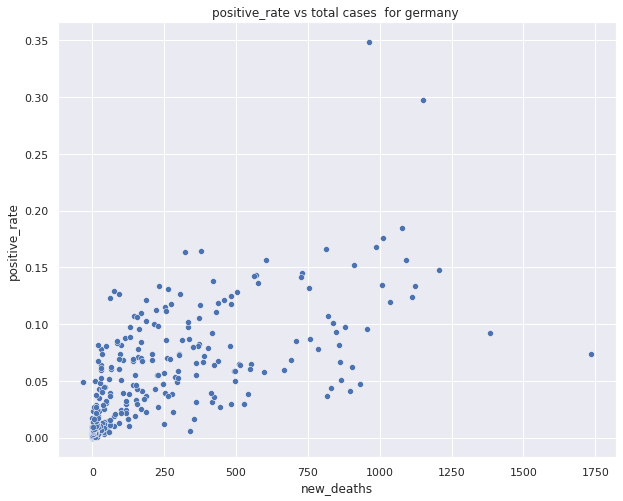

In [34]:
for i, feature in enumerate(df_germany.columns[1:len(df_germany.columns)-2]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany.new_deaths,y=feature,data=df_germany).set_title(feature +" vs total cases  for germany ")

#### Since our target variable is new cases , checking the variablity of new cases with time with repect to reprocuction rate , positive rate and stregency index with help seaborn scatter plot.

Text(0.5, 1.0, 'new_deaths vs date woth hue as reproduction_rate')

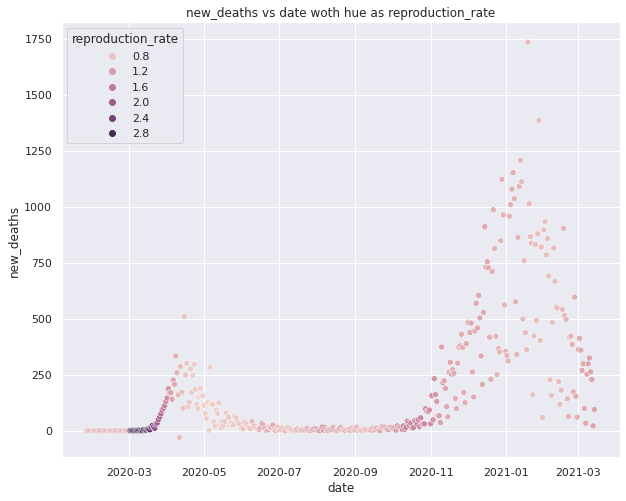

In [35]:
sns.scatterplot(y=df_germany.new_deaths,x=df_germany.date,hue=df_germany.reproduction_rate).set_title("new_deaths vs date woth hue as reproduction_rate")

Text(0.5, 1.0, 'new cases vs date woth hue as positive rate')

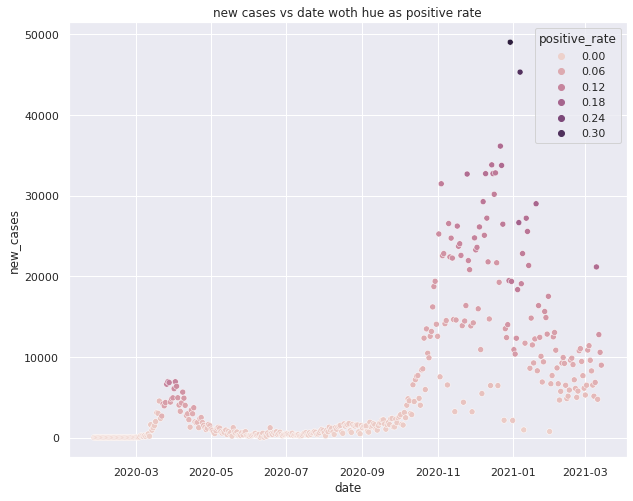

In [36]:
sns.scatterplot(y=df_germany.new_cases,x=df_germany.date,hue=df_germany.positive_rate).set_title("new cases vs date woth hue as positive rate")

Text(0.5, 1.0, 'new cases vs date woth hue as stringency_index')

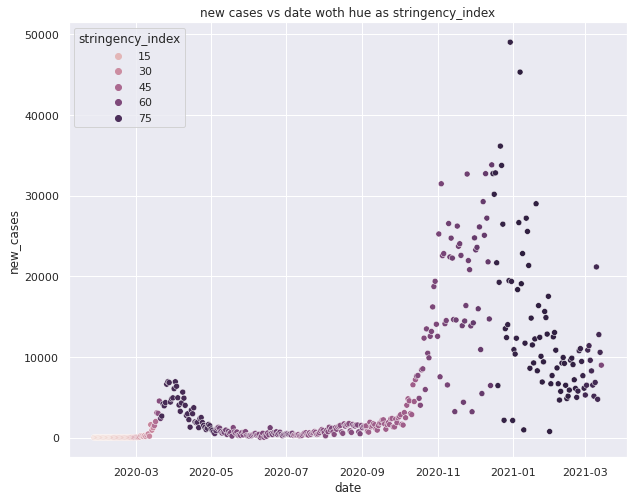

In [37]:

sns.scatterplot(y=df_germany.new_cases,x=df_germany.date,hue=df_germany.stringency_index).set_title("new cases vs date woth hue as stringency_index")

#### Comparint he variation of total cases , new cases, new deaths and total deaths with repect to time using seaborn line plot.

Text(0.5, 1.0, 'variation of deaths,new,cases, total cases and new_deaths with respect each day')

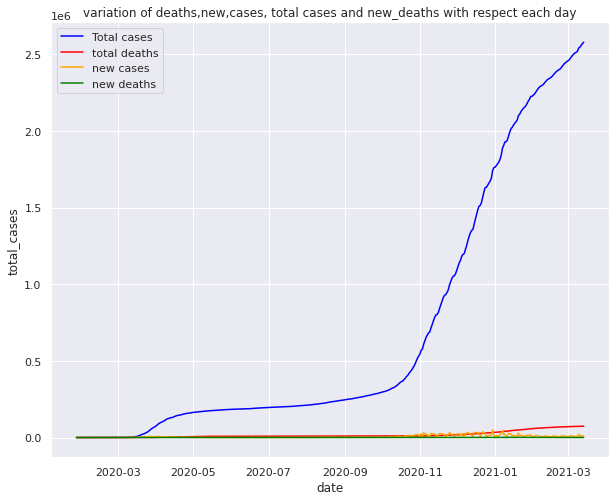

In [38]:
sns.lineplot(x=df_germany.date,y= df_germany.total_cases, color="blue", label="Total cases", linestyle="-")
sns.lineplot(x=df_germany.date, y= df_germany.total_deaths ,color="red", label="total deaths", linestyle="-")
sns.lineplot(x=df_germany.date, y= df_germany.new_cases ,color="orange", label="new cases", linestyle="-")
sns.lineplot(x=df_germany.date ,y= df_germany.new_deaths, color="green", label="new deaths", linestyle="-").set_title("variation of deaths,new,cases, total cases and new_deaths with respect each day")

Text(0.5, 1.0, 'variation of total deaths,new cases, and new deaths with respect each day')

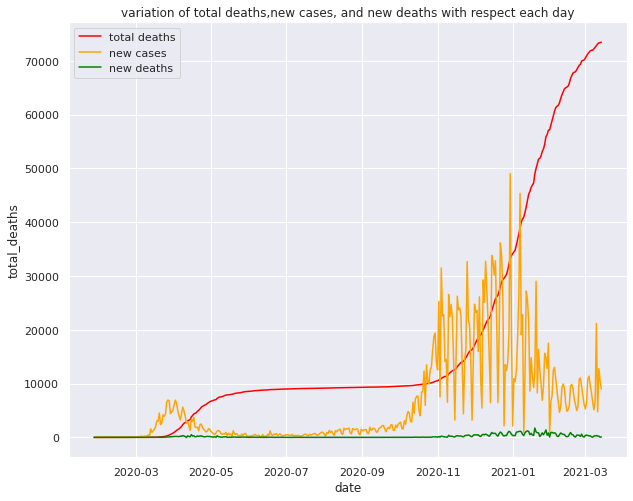

In [39]:
sns.lineplot(x=df_germany.date, y= df_germany.total_deaths ,color="red", label="total deaths", linestyle="-")
sns.lineplot(x=df_germany.date, y= df_germany.new_cases ,color="orange", label="new cases", linestyle="-")
sns.lineplot(x=df_germany.date ,y= df_germany.new_deaths, color="green", label="new deaths", linestyle="-").set_title("variation of total deaths,new cases, and new deaths with respect each day")

In [40]:
df_germany1 =df_germany.copy()

# 3) Modeling and feature selection

## Performing time series forcasting using fb peophet to predict the new cases.
## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [41]:
from fbprophet import Prophet
new_case = df_germany[['date','new_cases']]
new_case.rename(columns={"date": "ds", "new_cases": "y"},inplace=True)
m = Prophet(interval_width=0.95)
m.fit(new_case)
future_new = m.make_future_dataframe(periods=70)
forecast_new = m.predict(future_new)
forecast_new[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
478,2021-05-19,3800.189405,-6468.704817,14618.561718
479,2021-05-20,2505.671056,-7885.376969,12673.375719
480,2021-05-21,1033.504590,-9372.041318,11581.552050
481,2021-05-22,44.171645,-10606.491347,10597.998869
482,2021-05-23,-2363.206646,-12132.185523,7918.981223


### Using Fbphrophet forcasting the data for next 70 days (i.e after march )

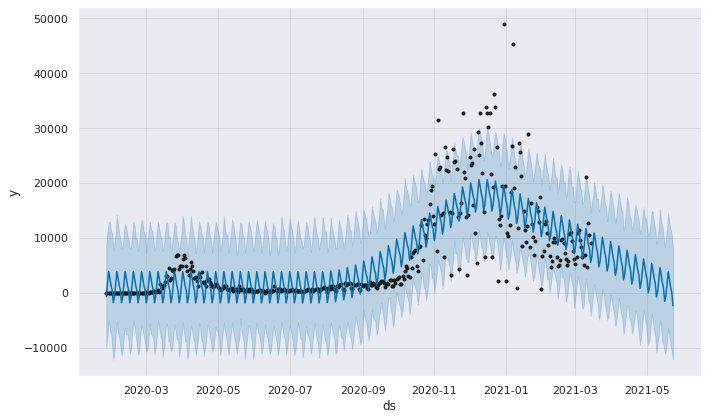

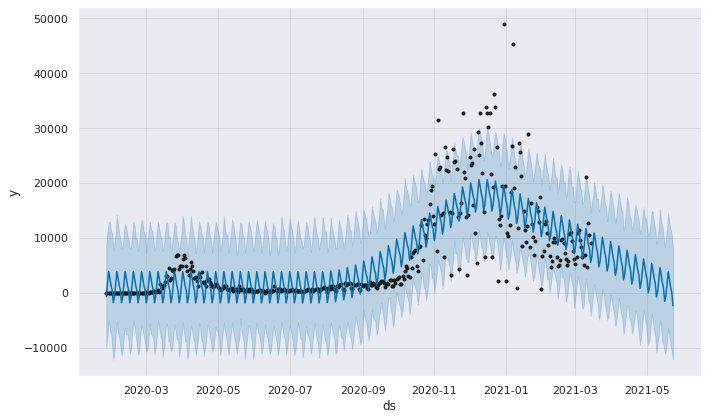

In [42]:
m.plot(forecast_new)

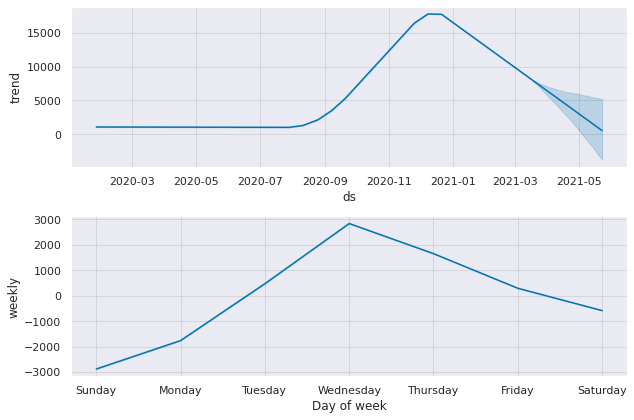

In [43]:
confirmed_forecast_plot =m.plot_components(forecast_new)

### Checking the acuracy of the model through corss validation 

In [44]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='210 days', period='35 days', horizon = '70 days')
df_cv.head()


INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-09-20 00:00:00 and 2021-01-03 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-21,734.386905,-1916.645827,3413.342570,1595.0,2020-09-20
1,2020-09-22,759.654765,-1955.221927,3624.089780,1852.0,2020-09-20
2,2020-09-23,1016.304238,-1490.938822,3656.308081,1613.0,2020-09-20
3,2020-09-24,1114.759531,-1612.614200,3732.183321,2321.0,2020-09-20
4,2020-09-25,1178.351306,-1579.374856,3928.554546,2366.0,2020-09-20


### Ploting the rmse plot.

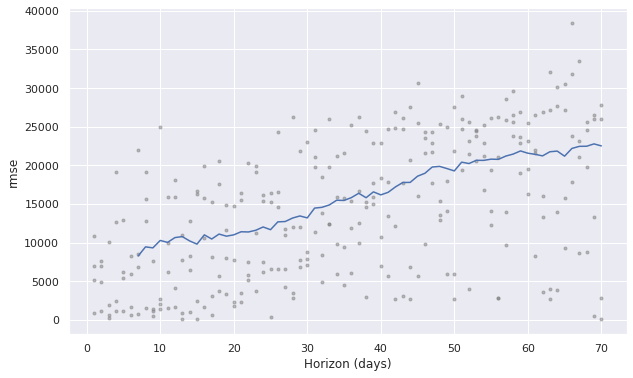

In [45]:

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

#### we can see that the accuracy of the model with the help of the rmse plot. we can see the point lie far from the line which mention the model dose not show good acuracy.

## SIR MODEL 
### The SIR model is one of the simplest compartmental models, and many models are derivatives of this basic form. The model consists of three compartments:-

#### S: The number of susceptible individuals. When a susceptible and an infectious individual come into "infectious contact", the susceptible individual contracts the disease and transitions to the infectious compartment.

#### I: The number of infectious individuals. These are individuals who have been infected and are capable of infecting susceptible individuals.

#### R for the number of removed (and immune) or deceased individuals. These are individuals who have been infected and have either recovered from the disease and entered the removed compartment, or died. It is assumed that the number of deaths is negligible with respect to the total population. This compartment may also be called "recovered" or "resistant".
#### The dynamics of an epidemic, for example, the flu, are often much faster than the dynamics of birth and death, therefore, birth and death are often omitted in simple compartmental models. The SIR system without so-called vital dynamics (birth and death, sometimes called demography) described above can be expressed by the following set of ordinary differential equations:

S = S(t)	is the number of susceptible individuals,

I = I(t)	is the number of infected individuals, and

R = R(t)	is the number of recovered individuals.

s(t) = S(t)/N,	the susceptible fraction of the population,

i(t) = I(t)/N,	the infected fraction of the population, and

r(t) = R(t)/N,	the recovered fraction of the population.

s(t) + i(t) + r(t) = 1.

#### No one is added to the susceptible group, since we are ignoring births and immigration. The only way an individual leaves the susceptible group is by becoming infected. We assume that the time-rate of change of  S(t),  the number of susceptibles,1 depends on the number already susceptible, the number of individuals already infected, and the amount of contact between susceptibles and infecteds. In particular, suppose that each infected individual has a fixed number  b  of contacts per day that are sufficient to spread the disease. Not all these contacts are with susceptible individuals. If we assume a homogeneous mixing of the population, the fraction of these contacts that are with susceptibles is  s(t).  Thus, on average, each infected individual generates  b s(t)  new infected individuals per day. [With a large susceptible population and a relatively small infected population, we can ignore tricky counting situations such as a single susceptible encountering more than one infected in a given day.]

#### We also assume that a fixed fraction  k  of the infected group will recover during any given day. For example, if the average duration of infection is three days, then, on average, one-third of the currently infected population recovers each day.



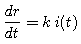

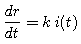

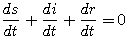


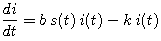

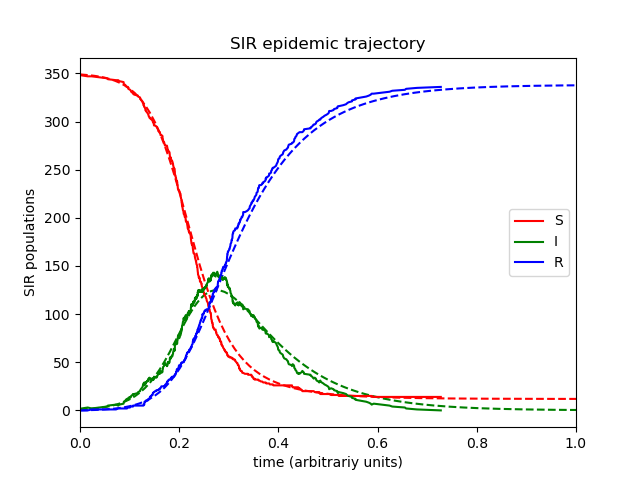

●N : Total population

●S(t) : Number of people susceptible on day t

●I(t) : Number of people infected on day t

●β (beta) : Expected amount of people an infected person infects per day. β is thetransmission rate constant.

●D : Number of days an infected person has and can spread the disease

●γ (gama) : The proportion of infected removed per day (γ = 1/D). γ the removal rateconstant.

In [46]:
df_germnay = df_germany1.copy
#define the parameters
N = 83783945
beta = 0.7
D = 14
gama = 1/D
#initial conditions
i0 = 1
s0 = (N-1)
r0 = 0
t = np.linspace(0,200,200)
x0 = s0,i0,r0

Text(0, 0.5, 'Fraction')

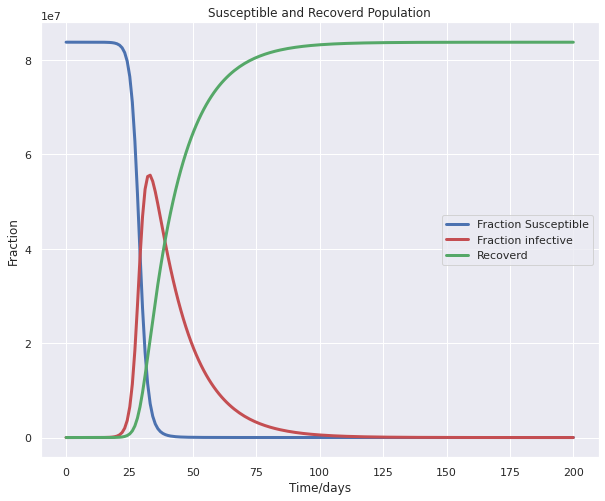

In [47]:
def deriv(x,t,beta,gama):
  s,i,r = x
  dsdt = -(beta*s*i)/N
  didt = (beta*s*i)/N- gama*i
  drdt = gama*i
  return[dsdt,didt,drdt]
#solving the set of differential equations using scipy's odeint  functions
from scipy.integrate import odeint
soln = odeint(deriv,x0,t,args=(beta,gama))
s,i,r = soln.T
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t,s,'b',lw = 3,label ='Fraction Susceptible' )
ax.plot(t,i,'r',lw = 3,label ='Fraction infective' )
ax.plot(t,r,'g',lw = 3,label ='Recoverd' )
ax.legend()
ax.set_title('Susceptible and Recoverd Population')
ax.set_xlabel('Time/days')
ax.set_ylabel('Fraction')

#### The above plot gives the prediction of the cases using sir model.

#### New feature active cases is obtained using total cases.

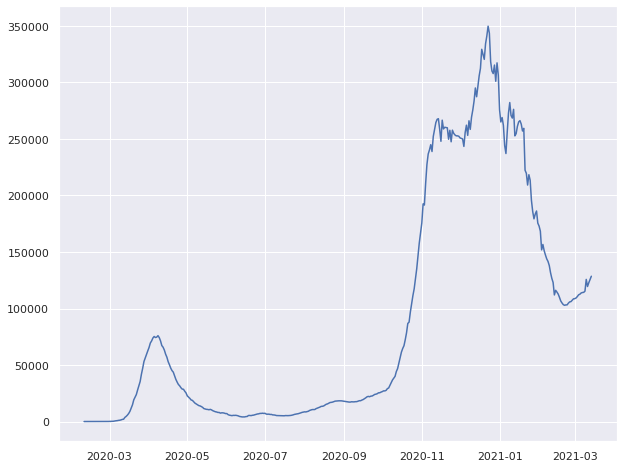

In [48]:
df_germany['total_cases_shifted']= df_germany.total_cases.shift(14)
df_germany['active_cases_calc']= df_germany['total_cases']-df_germany['total_cases_shifted']
plt.plot(df_germany.date,df_germany['active_cases_calc'])

#### To check the accuracy of the model lets compare the active cases as we are concentrated in prediction of active cases. 

In [49]:

d= {'actual':list(df_germany['active_cases_calc'][14:214]),'predicted': list(i) }
result = pd.DataFrame(data=d)

In [50]:

from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

result[['actual','predicted']]= scaler1.fit_transform(result[['actual','predicted']])

Mean absolute error: 0.22
Residual sum of squares (MSE): 0.10
 R2 score -0.9928125532918501


Text(0.5, 1.0, 'comparison')

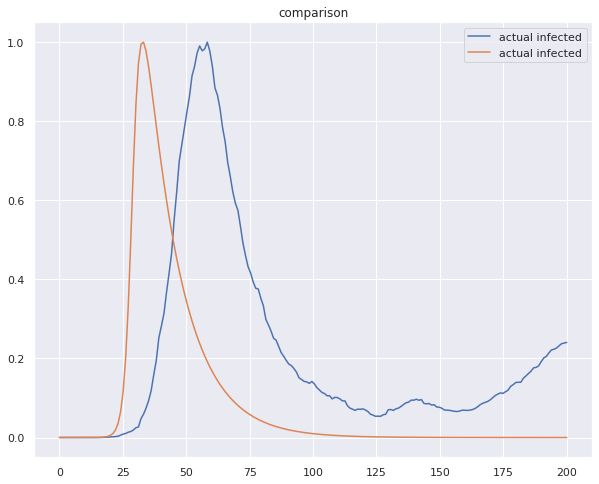

In [51]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(result.predicted - result.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result.predicted - result.actual) ** 2))
print(" R2 score",r2_score(result.predicted,result.actual))
plt.plot(t,result.actual, label='actual infected')
plt.plot(t,result.predicted, label='actual infected')
plt.legend()
plt.title('comparison')

## MULTIPLE LINEAR REGRESSION MODEL 
What Is Multiple Linear Regression (MLR)?
Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

In essence, multiple regression is the extension of ordinary least-squares (OLS) regression because it involves more than one explanatory variable.

Formula and Calculation of Multiple Linear Regression

y_i = beta_0 + beta _1* x_i1 + beta _2 * x_i2 + ... + beta _p*x_ip + epsilon

where, for i = n observations:

y_i=tdependent variable

x_i=explanatory variables

beta_0=y-intercept

beta_p=slope coefficients for each explanatory variable

epsilon=the model's error term (also known as the residuals)

What Multiple Linear Regression Can Tell You
Simple linear regression is a function that allows an analyst or statistician to make predictions about one variable based on the information that is known about another variable. Linear regression can only be used when one has two continuous variables—an independent variable and a dependent variable. The independent variable is the parameter that is used to calculate the dependent variable or outcome. A multiple regression model extends to several explanatory variables.

In [52]:
df_germnay = df_germany1.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Taking the cube root of the data to reduce the outliers.

In [53]:
df_germany[['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests_smoothed', 'stringency_index', 'reproduction_rate','positive_rate',
       ]] = np.cbrt(df_germany[['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests_smoothed', 'stringency_index', 'reproduction_rate','positive_rate',
     ]])

#### Applying min max saclare for the data.

In [54]:
df_germany[['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests_smoothed', 'stringency_index', 'reproduction_rate','positive_rate',
       ]] = scaler.fit_transform(df_germany[['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests_smoothed', 'stringency_index', 'reproduction_rate','positive_rate',
      ]])

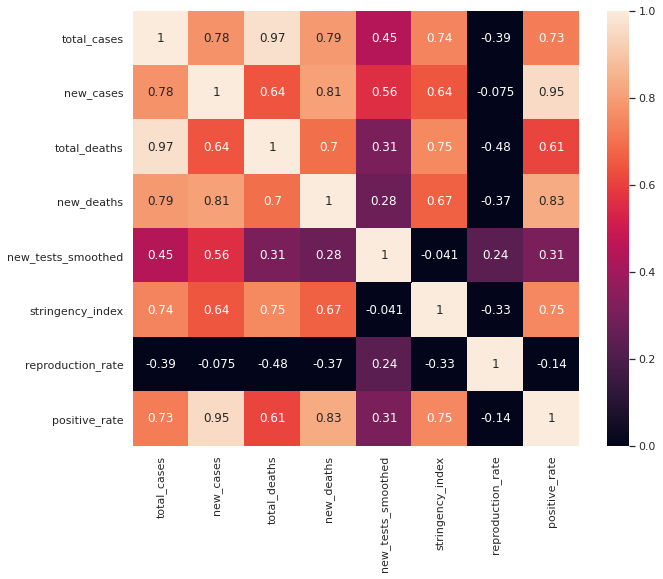

In [55]:
cor  = df_germany[['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests_smoothed', 'stringency_index', 'reproduction_rate','positive_rate',
       ]].corr()
sns.heatmap(cor, vmin=0, vmax=1,annot=True)

### Heat map of the selected features / independent features to check its coliniearity.

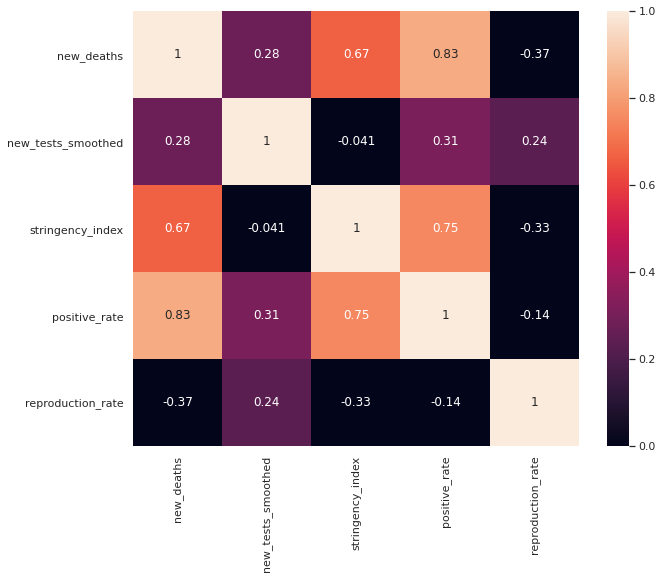

In [56]:
corr = df_germany[[ 'new_deaths',
       'new_tests_smoothed', 'stringency_index', 'positive_rate','reproduction_rate'
      ]].corr()
sns.heatmap(corr, vmin=0, vmax=1,annot=True)

* ### Selcting features for independent variabels are new_deaths 'stringency_index', 'positive_rate','reproduction_rate.
* ###  The features total cases and total deaths are exponential and the data keep on inreasing hence adding that to the traning set may not yeild us good result.
* ### New test smoothed and positive rate have same information and may lead to overfitting of the model.

In [57]:
from sklearn.model_selection import train_test_split
X = df_germany[[ 'new_deaths','stringency_index', 'positive_rate','reproduction_rate']]
y= df_germany['new_cases']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=1)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
Yhat =regr.predict(X_test)
y_test = np.asanyarray(y_test)
print("test data score",regr.score(X_test,y_test))
print("train data score",regr.score(X_train,y_train))
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(Yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Yhat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(Yhat ,y_test) )

Coefficients:  [ 0.1094826  -0.15996331  1.13225994  0.04225636]
Intercept:  0.0008404128542364719
test data score 0.9212398080695743
train data score 0.9301896009525472
Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.91


### Traing the data as hole by spliting them to testing and traning sets and performing the multiple linear regression .
we obtain the following accuracy 
* Test data score 0.92
* Train data score 0.93
* Mean absolute error: 0.05
* Residual sum of squares (MSE): 0.00
* R2-score: 0.91

### Splitting the data into test and train data , splitting the data from jan to december of 2020 for traning and jan to march 2021 for testing.

In [58]:
print("Shape of data",df_germany.shape)
df_grouped1 = df_germany[   ( df_germany['month'] != 'January2021')& ( df_germany['month'] != 'February2021' )& ( df_germany['month'] != 'March2021')]
print(" Shape of Traning data set",df_grouped1.shape)
df_grouped2 =df_germany[  ( df_germany['month'] == 'January2021') |( df_germany['month'] == 'February2021' )| ( df_germany['month'] == 'March2021')]
print("Shape of testing data set ",df_grouped2.shape)

Shape of data (413, 13)
 Shape of Traning data set (340, 13)
Shape of testing data set  (73, 13)


* Shape of data (413, 11)
* Shape of Traning data set (340, 11)
* Shape of testing data set  (73, 11)

train data score 0.9131789711650572
regression score for second wave 0.8856369314419544
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.92


Text(0, 0.5, 'new cases normalized')

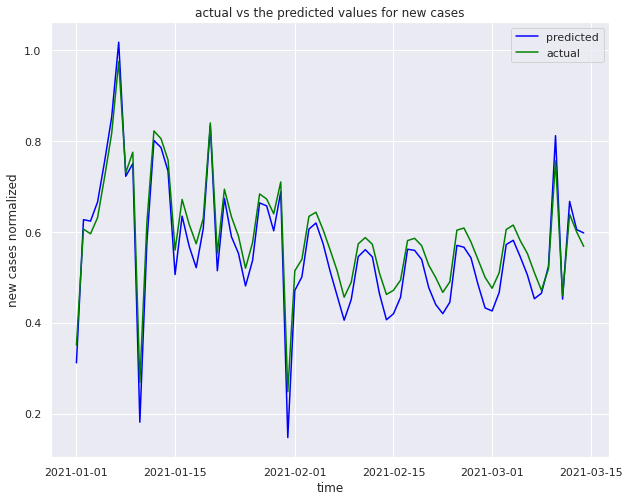

In [59]:
from sklearn.model_selection import train_test_split
X1 = df_grouped1[[ 'positive_rate','stringency_index','new_deaths','reproduction_rate']]
y1= df_grouped1['new_cases']
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
regr1.fit (X1, y1)
print("train data score",regr1.score(X1,y1))
x = df_grouped2[[  'positive_rate','stringency_index','new_deaths','reproduction_rate']]
Yhat2 =regr1.predict(x)
y_test2 = np.asanyarray(df_grouped2['new_cases'])
print("regression score for second wave",regr1.score(x,y_test2))
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(Yhat2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Yhat2 - y_test2) ** 2))
print("R2-score: %.2f" % r2_score(Yhat2 ,y_test2))
ax= sns.lineplot(x= df_grouped2.date,y=Yhat2, color="blue", label="predicted")
ax = sns.lineplot(x= df_grouped2.date,y=y_test2, color="green", label="actual")
ax.set_title("actual vs the predicted values for new cases")
ax.set_xlabel('time')
ax.set_ylabel('new cases normalized')

### We obtain the following accuracy for the above model 
* Train data score 0.91
* Regression score for second wave 0.88
* Mean absolute error: 0.04
* Residual sum of squares (MSE): 0.00
* R2-score: 0.92


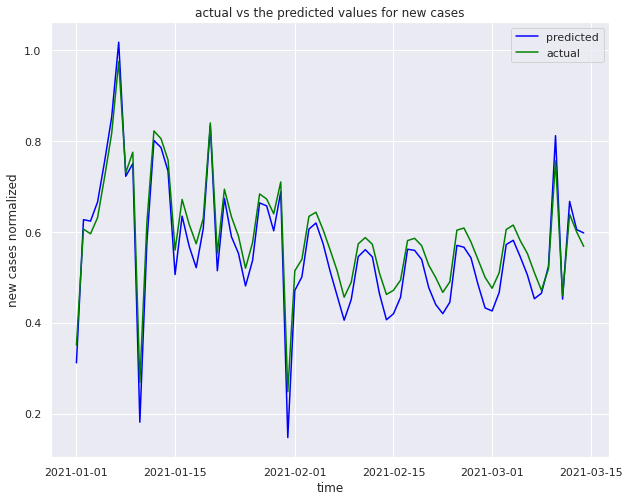

#### Evaluation of the model is done using 
* MAE
* MSE
* R2 score

#### MSE(mean squared error)

In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.


y=Mx+B, where M is the slope of the line and B is y-intercept of the line.

We want to find M (slope) and B (y-intercept) that minimizes the squared error!

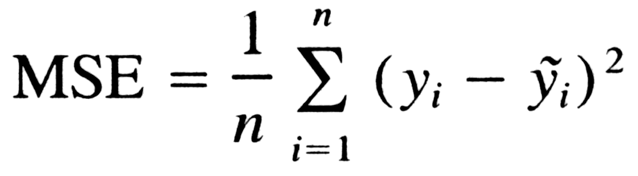

### Mean absolute error

In statistics, mean absolute error is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. 

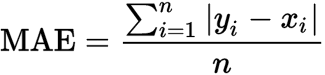


MAE	=	mean absolute error

y_i	=	prediction

x_i	=	true value

n	=	total number of data points



### R squared error

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

There are several definitions of R2 that are only sometimes equivalent. One class of such cases includes that of simple linear regression where r2 is used instead of R2. When an intercept is included, then r2 is simply the square of the sample correlation coefficient (i.e., r) between the observed outcomes and the observed predictor values. If additional regressors are included, R2 is the square of the coefficient of multiple correlation. In both such cases, the coefficient of determination normally ranges from 0 to 1.

There are cases where the computational definition of R2 can yield negative values, depending on the definition used. This can arise when the predictions that are being compared to the corresponding outcomes have not been derived from a model-fitting procedure using those data. Even if a model-fitting procedure has been used, R2 may still be negative, for example when linear regression is conducted without including an intercept, or when a non-linear function is used to fit the data.In cases where negative values arise, the mean of the data provides a better fit to the outcomes than do the fitted function values, according to this particular criterion.

# Plotly

In [494]:

import plotly.offline as pyo
import plotly.graph_objects as go

In [495]:
data =[] 
data.append(go.Line(x= df_grouped2.date,y=Yhat2,  name="predicted"))
data.append(go.Line(x= df_grouped2.date,y=y_test2,  name="actual"))
layout = go.Layout(title="Actual vs predicted ouput of the multiple regression")
go.Figure(data=data,layout=layout)

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [496]:
data_sir =[] 
data_sir.append(go.Line(x=t,y= result.actual,  name="actual"))
data_sir.append(go.Line(x=t,y= result.predicted,  name="predicted"))
layout_sir = go.Layout(title="Actual vs predicted ouput of the multiple regression")
go.Figure(data=data_sir,layout=layout_sir)

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [497]:
def multi_plot(df, title, addAll = True):
    fig = go.Figure()
    df = df.set_index('date')
    df = df.drop(columns=['month', 'year'],axis=1)
    for column in df.columns.to_list():
        fig.add_trace(
            go.Line(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
           
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800
        
    )
   
    fig.show()

In [498]:
multi_plot(df_germany1, title=" COVID-19 time series For germany")

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [499]:
def multi_plot_bar(df, title, addAll = True):
    fig = go.Figure()
    
    df = df.drop(columns=[ 'year' ],axis=1)
    for column in df.columns.to_list():
        fig.add_trace(
            go.Bar(
                x = df.index,
                y = df[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
           
    )
    
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800
        
    )
   
    fig.show()

In [500]:
multi_plot_bar(df_grouped, title=" COVID-19 time series For germany")